# Machine Learning: AllLife Bank Personal Loan Campaign

## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [4]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    make_scorer,
)

import scipy.stats
import warnings
warnings.filterwarnings("ignore")  # ignore warnings

%matplotlib inline
sns.set()

## Loading the dataset

In [122]:
loan=pd.read_csv('Loan_Modelling.csv')

In [123]:
df=loan.copy()

## Data Overview

* Observations
* Sanity checks

### Head and Tail

In [10]:
df.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [24]:
df.tail()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


### Data information

In [14]:
# Number of row and columns
df.shape

(5000, 14)

In [392]:
# dtypes: float64(1), int64(13)
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


### Statistic

In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIPCode,5000.0,93169.257000,1759.455086,90005.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal_Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


1- No Null Number

2- one float and 13 intiger

3- 13 columns

In [27]:
# Colimns array of 13 columns
df.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

### data type

In [375]:
df.dtypes

ID                      int64
Age                     int64
Experience              int64
Income                  int64
ZIPCode                 int64
Family                  int64
CCAvg                 float64
Education               int64
Mortgage                int64
Personal_Loan           int64
Securities_Account      int64
CD_Account              int64
Online                  int64
CreditCard              int64
dtype: object

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

In [32]:
# How many customers have credit cards?
df['CreditCard'].sum()

1470

### What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?

In [76]:
df['Mortgage'].describe()

count    5000.000000
mean       56.498800
std       101.713802
min         0.000000
25%         0.000000
50%         0.000000
75%       101.000000
max       635.000000
Name: Mortgage, dtype: float64

Mortgage has skew to right

In [79]:
# People has No mortgage
df['Mortgage'].value_counts()[0]

3462

In [85]:
# Number unique mortgage 
df['Mortgage'].nunique()

347

In [92]:
# Unique mortgage  Length: 347, dtype: int64
df['Mortgage'].value_counts()[:]

0      3462
98       17
119      16
89       16
91       16
       ... 
547       1
458       1
505       1
361       1
541       1
Name: Mortgage, Length: 347, dtype: int64

<Axes: ylabel='Mortgage'>

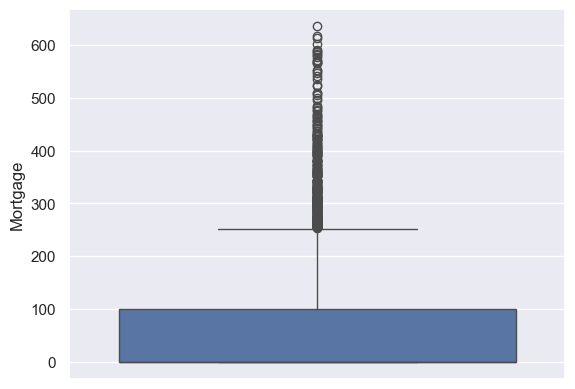

In [115]:
# Mortgage outlier 
sns.boxplot(df['Mortgage'])

In [9]:
# Numberof people who has no mortgage (Mortgage=0)
len(df[df['Mortgage']==0])

3462

<Axes: xlabel='Mortgage', ylabel='Count'>

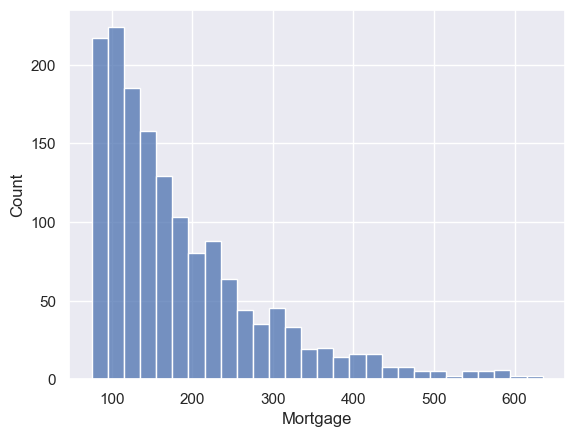

In [102]:
# Plot for who has mortgage
sns.histplot(df[df['Mortgage']>0],x='Mortgage')

- Mortgage has a right Skew

### How many customers have credit cards?

In [111]:
# How many customers have credit cards?
df['CreditCard'].sum()

1470

### What are the attributes that have a strong correlation with the target attribute (personal loan)?



In [124]:
# Correlation
df.corr()['Personal_Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007858
Income                0.502462
ZIPCode              -0.002974
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

### convert numerical to catigorical variable

In [5]:
# Chang database  New
df_new=df.copy()

In [6]:
df_new.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [9]:

df_new['Personal_Loan']=df_new['Personal_Loan'].replace(0,'No')
df_new['Personal_Loan']=df_new['Personal_Loan'].replace(1,'Yes')


In [8]:
df_new['Mortgage']=df_new['Mortgage'].replace({0:'No',1:'Yes'})
df_new['Securities_Account']=df_new['Securities_Account'].replace({0:'No',1:'Yes'})
df_new['CD_Account']=df_new['CD_Account'].replace({0:'No',1:'Yes'})
df_new['Online']=df_new['Online'].replace({0:'No',1:'Yes'})
df_new['CreditCard']=df_new['CreditCard'].replace({0:'No',1:'Yes'})

In [10]:
df_new['Education']=df_new['Education'].replace({1:'Undergraduaate',2:'Graduate',3:'Advanced/Professional'})

In [11]:
df_new.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergraduaate,No,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Undergraduaate,No,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Undergraduaate,No,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Graduate,No,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Graduate,No,No,No,No,No,Yes


### How does a customer's interest in purchasing a loan vary with their age?

In [167]:
# Correlation Age and Personal_Loan
df['Age'].corr(df['Personal_Loan'], method='pearson')

-0.00772561717353405

In [210]:
# Number of Unique
df_new.groupby('Personal_Loan')['Age'].nunique()

Personal_Loan
No     45
Yes    40
Name: Age, dtype: int64

In [321]:
# grouping how get personal loan based on age
df_new.groupby('Personal_Loan')['Age'].value_counts()

Personal_Loan  Age
No             35     135
               43     134
               58     133
               52     130
               41     128
                     ... 
Yes            40       8
               41       8
               64       8
               31       7
               39       6
Name: Age, Length: 85, dtype: int64

In [323]:
# number of how did not get loan
l_no=df_new[df_new['Personal_Loan']=='No']['Age'].value_counts().sum()
l_no

4520

In [324]:
# number of how  get loan
l_yes=df_new[df_new['Personal_Loan']=='Yes']['Age'].value_counts().sum()
l_yes

480

In [325]:
# percentag of don have loan
print('did not get loan=',(l_no/5000)*100,'%')

did not get loan= 90.4 %


In [211]:
# catigory for loan situation
df_new.groupby('Personal_Loan')['Age'].unique()

Personal_Loan
No     [25, 45, 39, 35, 37, 53, 50, 65, 29, 48, 59, 6...
Yes    [34, 38, 46, 42, 32, 37, 50, 56, 31, 54, 55, 5...
Name: Age, dtype: object

<Axes: xlabel='Age', ylabel='Count'>

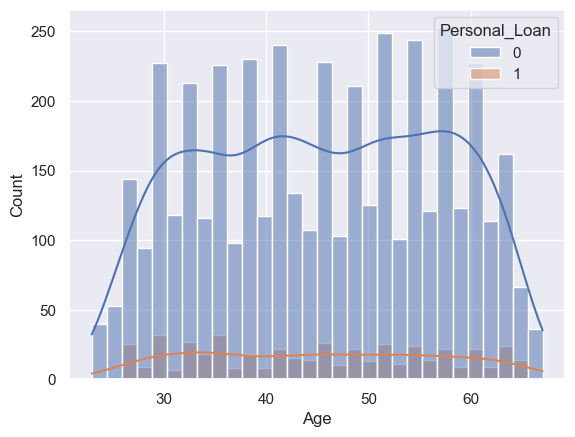

In [366]:
# Plot for Age and Personal_loan
sns.histplot(df_new,x='Age',hue='Personal_Loan',bins=30,kde=True)

<Axes: xlabel='Age', ylabel='Personal_Loan'>

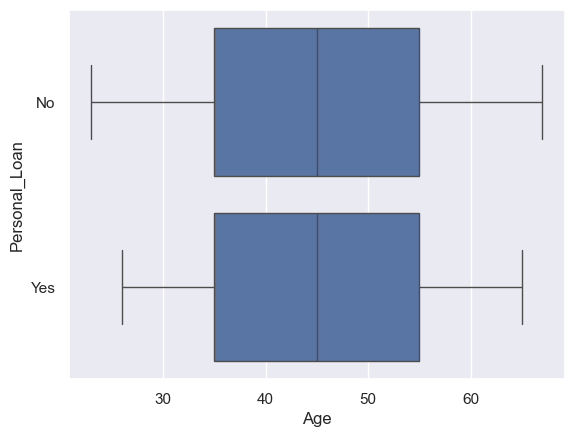

In [213]:
sns.boxplot(df_new,x='Age',y='Personal_Loan')

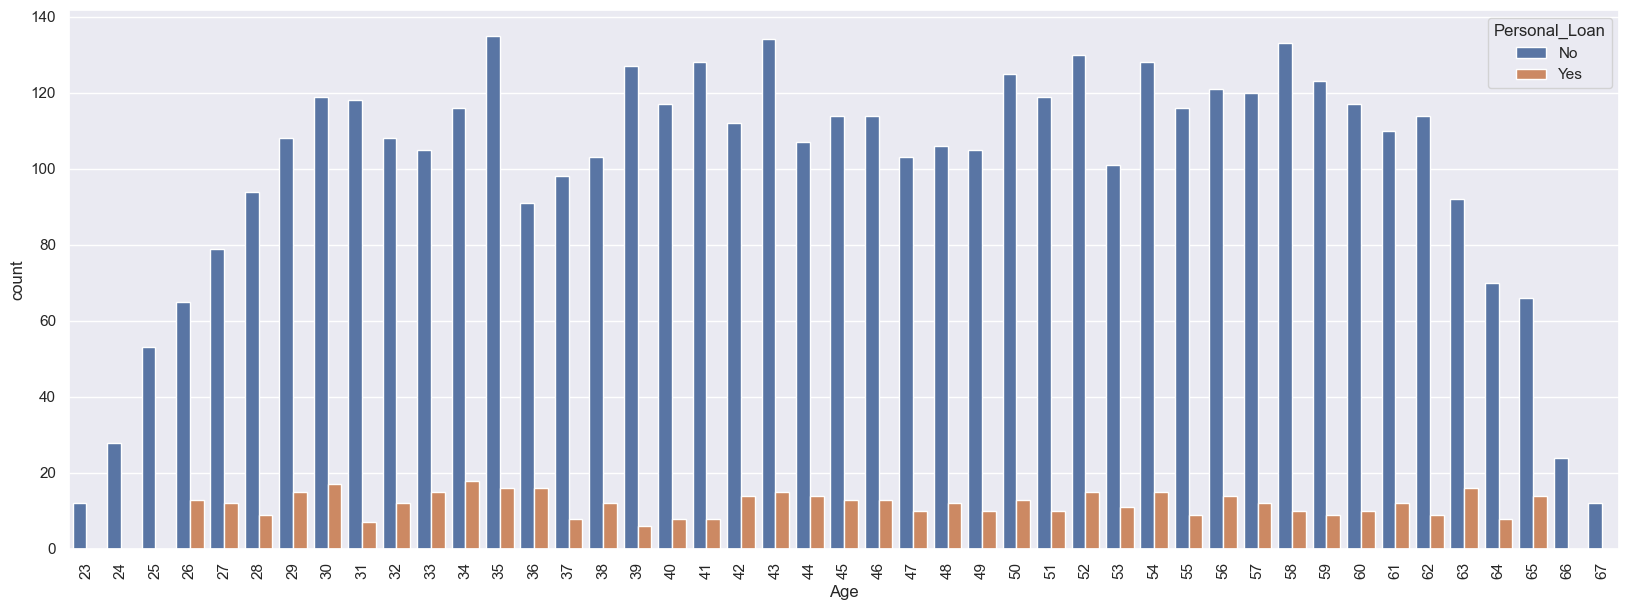

In [348]:
plt.figure(figsize=(20,7))
sns.countplot(df_new,x='Age',hue="Personal_Loan")
plt.xticks(rotation=90)

plt.show()

### How does a customer's interest in purchasing a loan vary with their education?

In [133]:
df['Education'].corr(df['Personal_Loan'], method='pearson')

0.13672155003028072

In [327]:
 
# Number of Unique
df_new.groupby('Personal_Loan')['Education'].unique()

Personal_Loan
No     [Undergraduaate, Graduate, Advanced/Professional]
Yes    [Advanced/Professional, Graduate, Undergraduaate]
Name: Education, dtype: object

In [362]:
# education 
df_n=df_new['Education'].value_counts().reset_index()
df_n.rename(columns={'index':'Education','Education':'Ferequently'},inplace=True)
df_n

,Education,Ferequently
0,Undergraduaate,2096
1,Advanced/Professional,1501
2,Graduate,1403


In [367]:
# grouping how get personal loan based on age
df_new.groupby('Personal_Loan')['Education'].value_counts()

Personal_Loan  Education            
No             Undergraduaate           2003
               Advanced/Professional    1296
               Graduate                 1221
Yes            Advanced/Professional     205
               Graduate                  182
               Undergraduaate             93
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='count'>

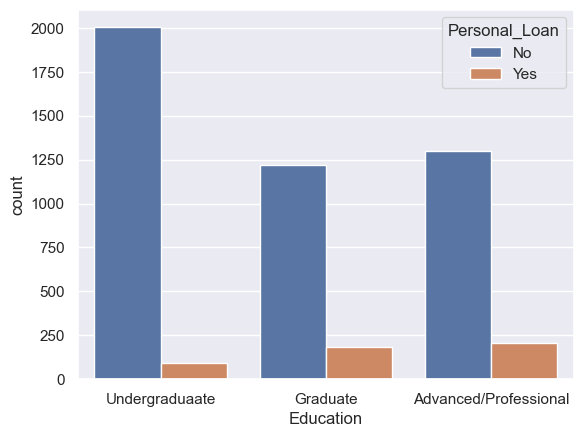

In [338]:
sns.countplot(df_new,x='Education',hue='Personal_Loan')

<Axes: xlabel='Education'>

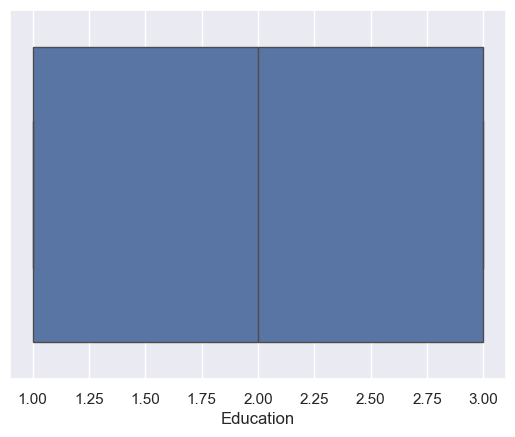

In [366]:
df_p=df_new.groupby('Personal_Loan')['Education'].value_counts()
sns.boxplot(dfP,x='Education')

### Experience

In [244]:
# Negetive number in experience
(df_new['Experience']<0).value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [289]:
df_new['Experience'][(df_new['Experience']<0)].unique()

array([-1, -2, -3], dtype=int64)

In [290]:
df_new['Experience'][(df['Experience']<0)].value_counts()

-1    33
-2    15
-3     4
Name: Experience, dtype: int64

In [263]:
(df_new['Experience']).value_counts()[-1]

33

In [261]:
(df_new['Experience']).value_counts()[-2]

15

In [262]:
(df_new['Experience']).value_counts()[-3]

4

In [19]:
# Replace -1 to 1
df_new['Experience']=df_new['Experience'].replace(-1,1)

In [20]:
# Replace -2 to 2
df_new['Experience']=df_new['Experience'].replace(-2,2)

In [21]:
# Replace -3 to 3
df_new['Experience']=df_new['Experience'].replace(-3,3)

In [267]:
# No negetive number in experience 
(df_new['Experience']<0).value_counts()

False    5000
Name: Experience, dtype: int64

In [22]:
df_e=(df_new['Experience']).value_counts().reset_index()
df_e.rename(columns={'Experience':'Fereqently','index':'Experience'},inplace=True)
df_e

,Experience,Fereqently
0,32,154
1,20,148
2,9,147
3,5,146
4,23,144
5,35,143
6,25,142
7,28,138
8,18,137
9,19,135


<Axes: xlabel='Experience', ylabel='Count'>

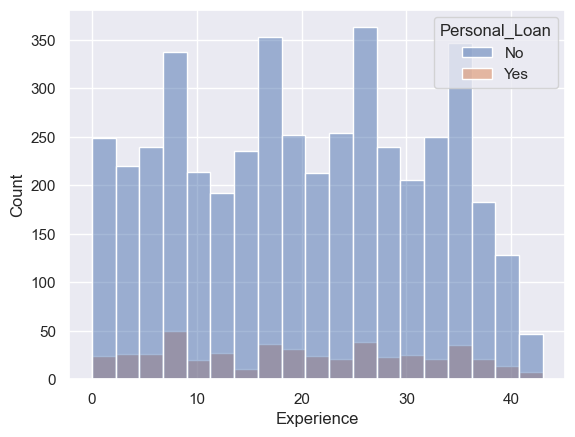

In [379]:
sns.histplot(df_new,x='Experience',hue='Personal_Loan')

<Axes: xlabel='Experience', ylabel='Personal_Loan'>

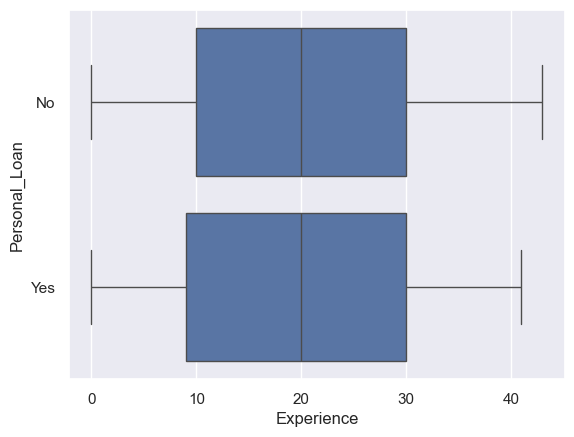

In [381]:
sns.boxplot(df_new,x='Experience',y='Personal_Loan')

### Others

In [269]:
# Number of customer accept the personal loan offered in the last campaign
df_new['Personal_Loan'].value_counts()['Yes']

480

In [270]:
# Number of customer have securities account with the bank
df_new['Securities_Account'].value_counts()['Yes']

522

In [271]:
# Number of customer have a certificate of deposit (CD) account with the bank
df_new['CD_Account'].value_counts()['Yes']

302

In [272]:
#Number of customers use internet banking facilities
df_new['Online'].value_counts()['Yes']

2984

In [273]:
# he customer have securities account with the bank
df_new['Securities_Account'].value_counts()['Yes']

522

## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [25]:
# Finding null value
(df_new.isnull()!=0).count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIPCode               5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal_Loan         5000
Securities_Account    5000
CD_Account            5000
Online                5000
CreditCard            5000
dtype: int64

- No null value

#### Data Correlation

In [124]:
df.corr()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.002240,-0.016797,-0.024675,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.030530,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.030456,-0.052563,-0.050077,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.030709,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIPCode,0.002240,-0.030530,-0.030456,-0.030709,1.000000,0.027512,-0.012188,-0.008266,0.003614,-0.002974,0.002422,0.021671,0.028317,0.024033
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.027512,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024675,-0.052012,-0.050077,0.645984,-0.012188,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.021463,0.041334,0.013152,-0.187524,-0.008266,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.003614,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal_Loan,-0.024801,-0.007726,-0.007413,0.502462,-0.002974,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


In [127]:
df.corr(method='spearman')['Personal_Loan']

ID                   -0.024801
Age                  -0.008151
Experience           -0.007905
Income                0.430739
ZIPCode              -0.000280
Family                0.061757
CCAvg                 0.313957
Education             0.139492
Mortgage              0.063294
Personal_Loan         1.000000
Securities_Account    0.021954
CD_Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal_Loan, dtype: float64

personal Loan most four  corr  :
   Income                0.430739 
   CD_Account            0.316355
   CCAvg                 0.313957
   Education             0.139492

<Axes: >

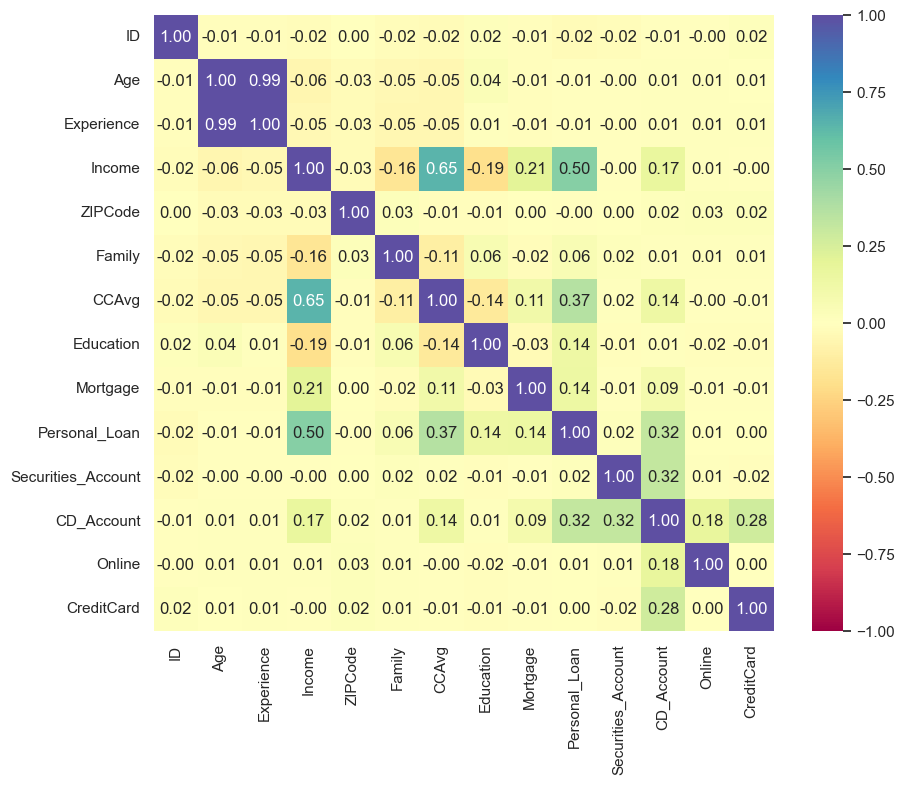

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")

### data types changing

In [399]:
df_new.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Undergraduaate,No,No,Yes,No,No,No
1,2,45,19,34,90089,3,1.5,Undergraduaate,No,No,Yes,No,No,No
2,3,39,15,11,94720,1,1.0,Undergraduaate,No,No,No,No,No,No
3,4,35,9,100,94112,1,2.7,Graduate,No,No,No,No,No,No
4,5,35,8,45,91330,4,1.0,Graduate,No,No,No,No,No,Yes


In [400]:
df_new['ZIPCode']

0       91107
1       90089
2       94720
3       94112
4       91330
        ...  
4995    92697
4996    92037
4997    93023
4998    90034
4999    92612
Name: ZIPCode, Length: 5000, dtype: int64

In [12]:
# Convert numerical to string because ZipCode have  not numarical value
df_new['ZIPCode']=df_new['ZIPCode'].astype(str)

In [437]:
df_new['ZIPCode'].nunique()

467

In [431]:
## df_new['ZIPCode']=df['ZIPCode'].copy()

In [13]:
# First 2 digit is more important and good for gettin insiths
df_new['ZIPCode'].str[0:2].unique()


array(['91', '90', '94', '92', '93', '95', '96'], dtype=object)

In [14]:
df_new['ZIPCode']=df_new['ZIPCode'].str[0:2]

In [15]:
df_new.head()

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91,4,1.6,Undergraduaate,No,No,Yes,No,No,No
1,2,45,19,34,90,3,1.5,Undergraduaate,No,No,Yes,No,No,No
2,3,39,15,11,94,1,1.0,Undergraduaate,No,No,No,No,No,No
3,4,35,9,100,94,1,2.7,Graduate,No,No,No,No,No,No
4,5,35,8,45,91,4,1.0,Graduate,No,No,No,No,No,Yes


In [412]:
df_new.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIPCode', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal_Loan', 'Securities_Account',
       'CD_Account', 'Online', 'CreditCard'],
      dtype='object')

In [28]:
# Catigorical column 
df_cat=['ZIPCode', "Education",    "Personal_Loan",    "Securities_Account",
    "CD_Account",    "Online",    "CreditCard"    ]
#conver  type string  to catigorical will reduce memory usage 
df_new[df_cat] = df_new[df_cat].astype("category")

In [420]:
df_new.dtypes

ID                       int64
Age                      int64
Experience               int64
Income                   int64
ZIPCode               category
Family                   int64
CCAvg                  float64
Education             category
Mortgage                object
Personal_Loan         category
Securities_Account    category
CD_Account            category
Online                category
CreditCard            category
dtype: object

## Exploratory Data Analysis (EDA)

### Bivariable

In [839]:
def HistBoxPlot (data, feature,target):
    # for numerical
    df_yes=data[data[target]=='Yes'].value_counts().reset_index()
    df_no=data[data[target]=='No'].value_counts().reset_index()

    plt.subplot(1,2,1)
    sns.histplot(data=df_no,x=feature ,kde=True , color="orange")
    plt.title(f"{target} NO")


    plt.subplot(1,2,2)
    sns.histplot(data=df_yes,x=feature,kde=True)
    plt.title(f"{target}  Yes")
    plt.show()

    plt.subplot(1,1,1)
    sns.boxplot(data=data,x=feature,color="green",)
    plt.show()
    
    plt.subplot(1,2,1)
    sns.boxplot(data=data, x=target, y=feature,  palette="gist_rainbow")
    plt.title(f"Boxplot of {target} ")
    
    plt.subplot(1,2,2)
    sns.boxplot(data=data, x=target, y=feature, showfliers=False,palette='Pastel1'  )
    plt.title(f"Boxplot of {target} without outlier")  
   
    plt.tight_layout()


#### 'Experience' Vs 'Personal_Loan')

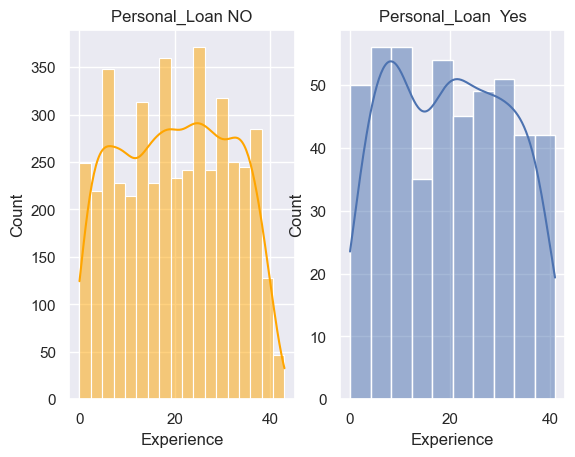

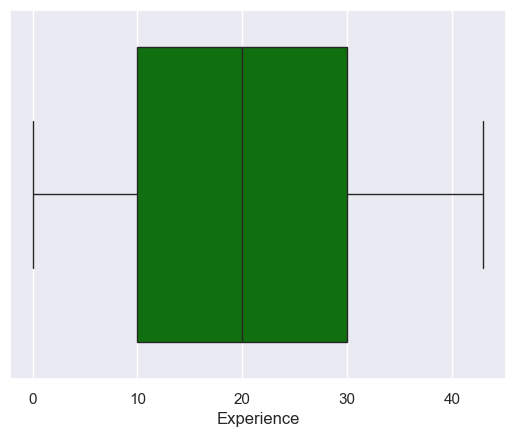

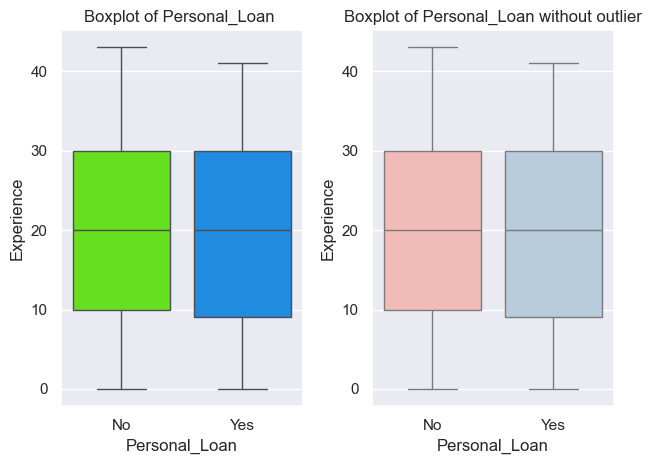

In [840]:
HistBoxPlot (df_new, 'Experience','Personal_Loan')

#### 'Age' Vs'Personal_Loan'

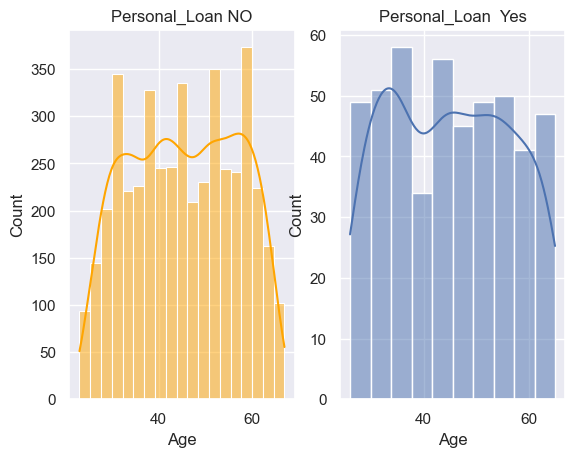

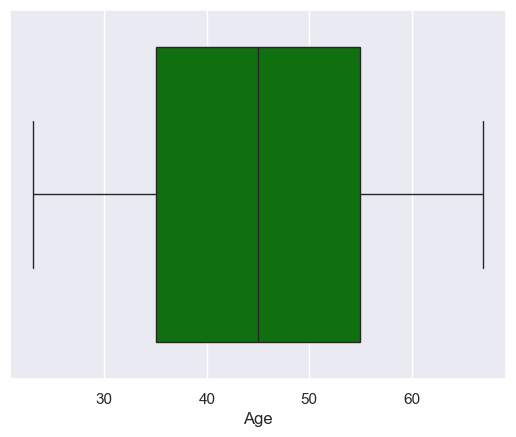

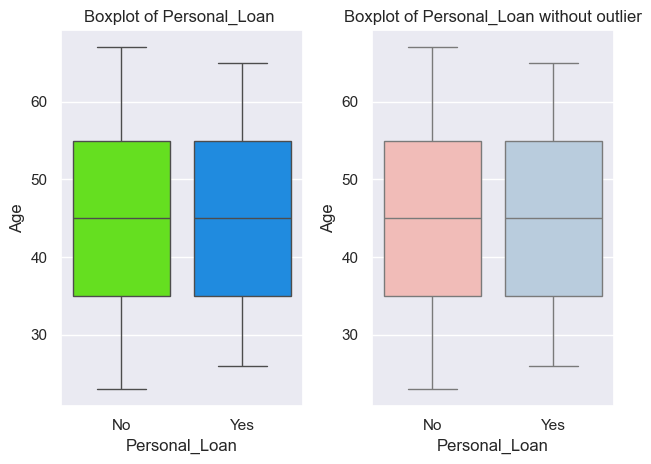

In [841]:
HistBoxPlot (df_new, 'Age','Personal_Loan')

####  'Income' Vs 'Personal_Loan'

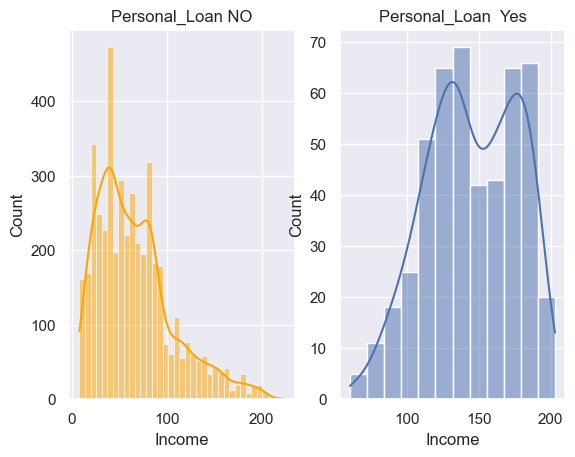

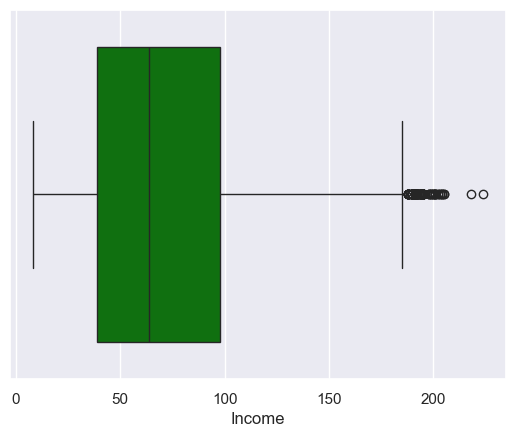

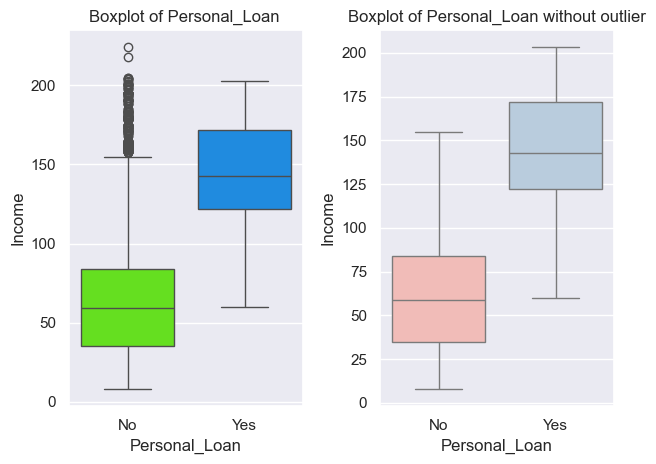

In [842]:
HistBoxPlot (df_new, 'Income','Personal_Loan')

#####  'CCAvg'  Vs  'Personal_Loan'

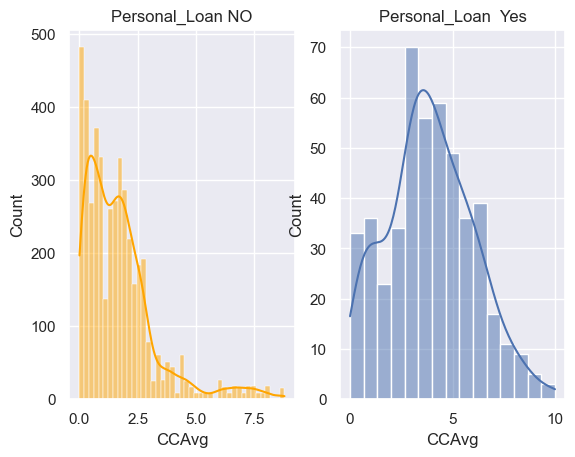

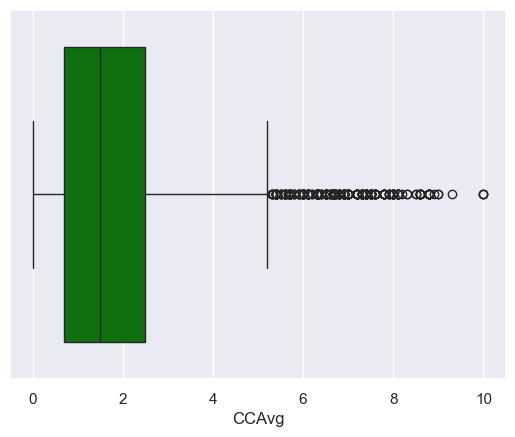

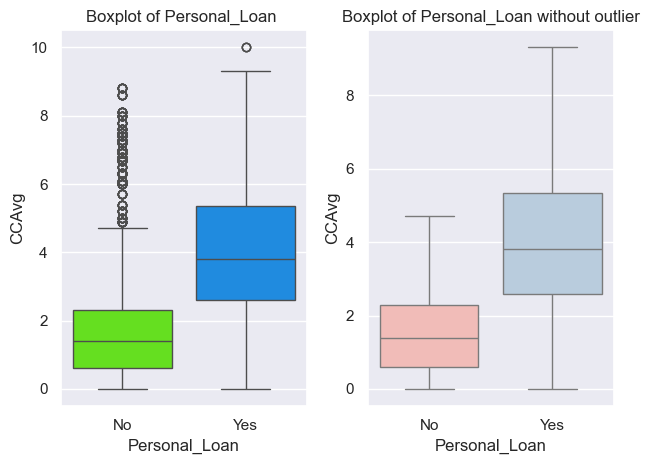

In [843]:
HistBoxPlot (df_new, 'CCAvg','Personal_Loan')

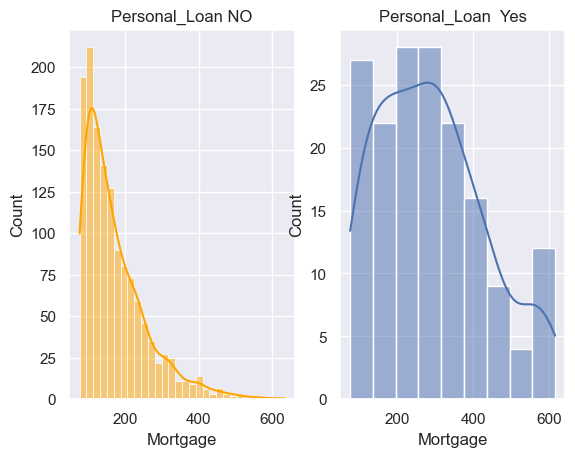

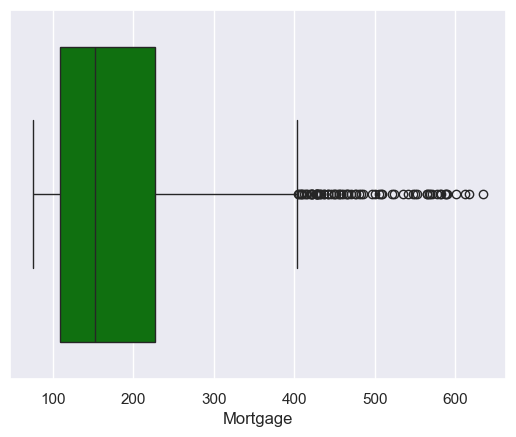

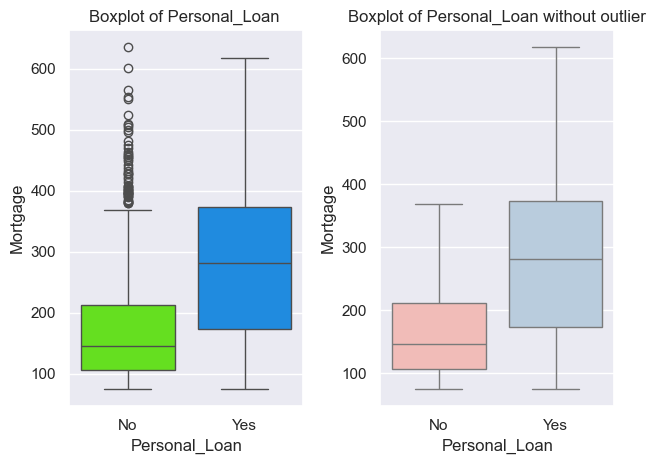

In [844]:
HistBoxPlot (df_new[df['Mortgage']>0], 'Mortgage','Personal_Loan')

<Axes: xlabel='Mortgage', ylabel='Count'>

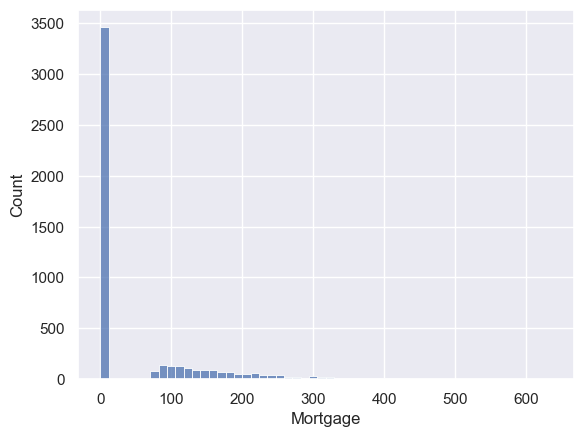

In [677]:
# Plot for who has mortgage
sns.histplot(df,x='Mortgage')

### Univariable

In [849]:
# for numerical value
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import PercentFormatter

def HistLablPlot(d, feature):
    # Sample data numerical 
    data = d[feature]
    X_lable=feature
    # Compute histogram heights and bins
    heights, bins = np.histogram(data, bins='auto')  # 'auto' can help determine the optimal number of bins
    
    # Compute percentages
    percent = [i / sum(heights) * 100 for i in heights]
    
    # Calculate bin width
    bin_width = np.diff(bins)[0]
    
    # Create the bar plot with dynamic bin width
    plt.figure(figsize=(20,7))
    plt.bar(bins[:-1], heights, width=bin_width, align="edge", edgecolor="black",color='gold')
    
    # Add text annotations inside each bar, but only if the percentage is greater than 0
    for i in range(len(bins)-1):
        if percent[i] > 0:  # Check if the percentage is greater than 0
            plt.text(bins[i] + bin_width/2, heights[i], f"{percent[i]:.1f}%", ha="center", va="bottom")

    # Set the x-axis ticks to be at the center of each bin
    plt.xticks(ticks=bins[:-1] + bin_width/2, labels=[f"{bin:.0f}" for bin in bins[:-1]])

    # Customize other plot properties (e.g., labels, title)
    plt.xlabel(X_lable)
    plt.ylabel("Count")
    plt.title("Histogram with Percentages ")

    # Show the plot
    plt.show()


#### Plot for Experience

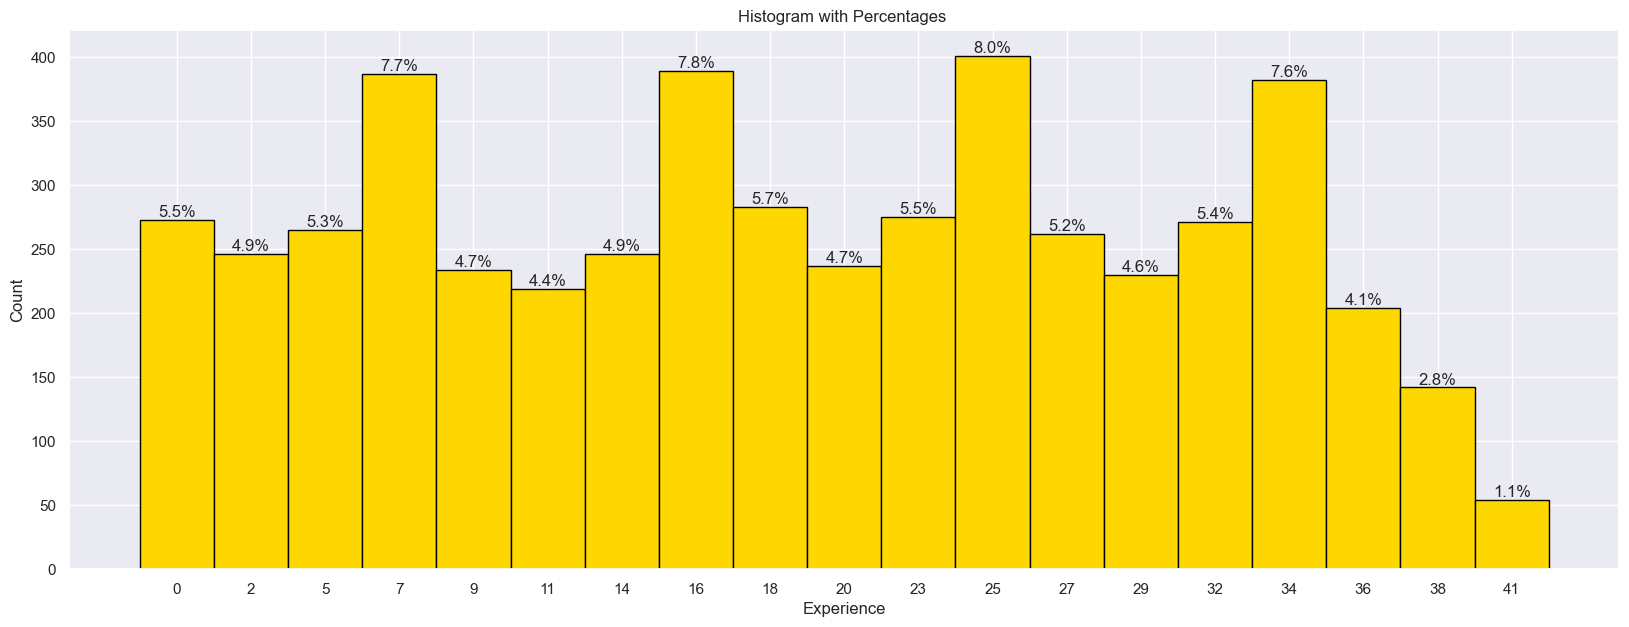

In [850]:
HistLablPlot(df_new, 'Experience')

####  Plot for Age

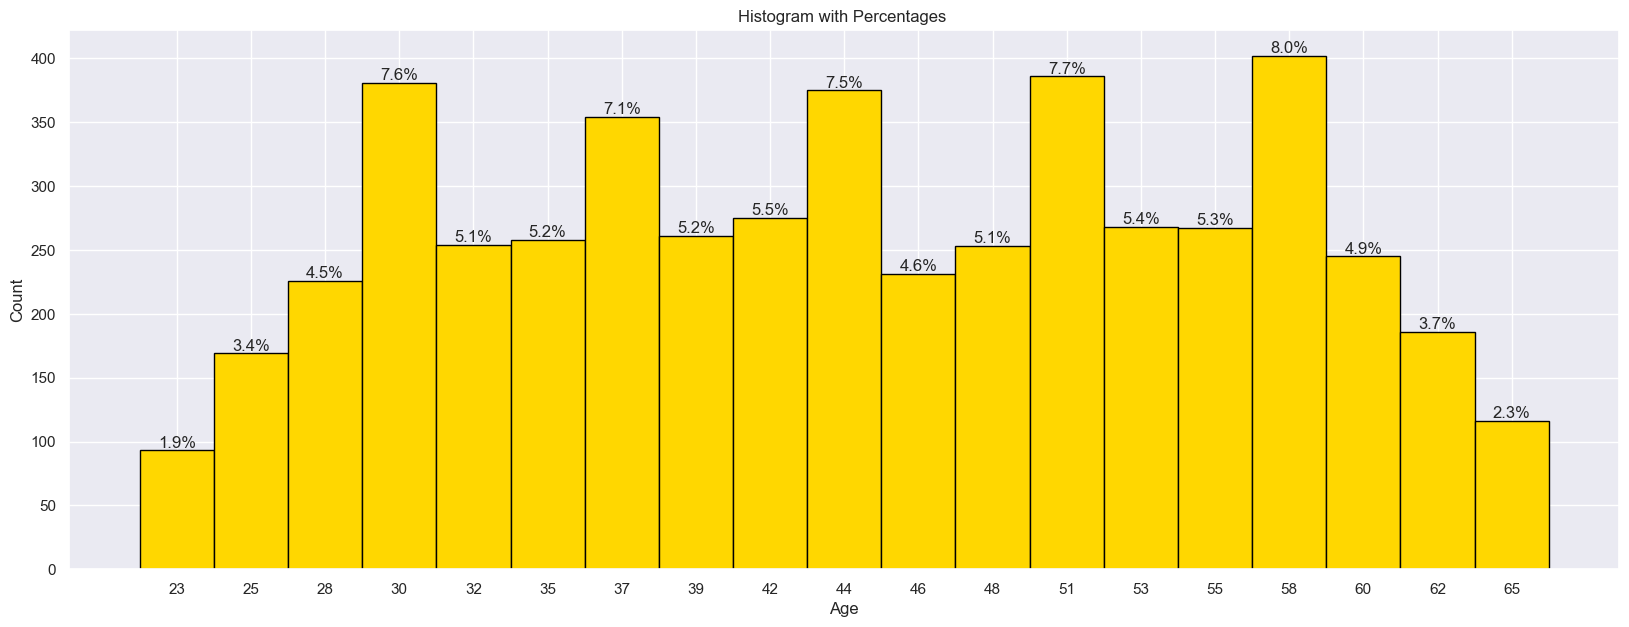

In [826]:
HistLablPlot (df_new,'Age')

#### Plot for Income

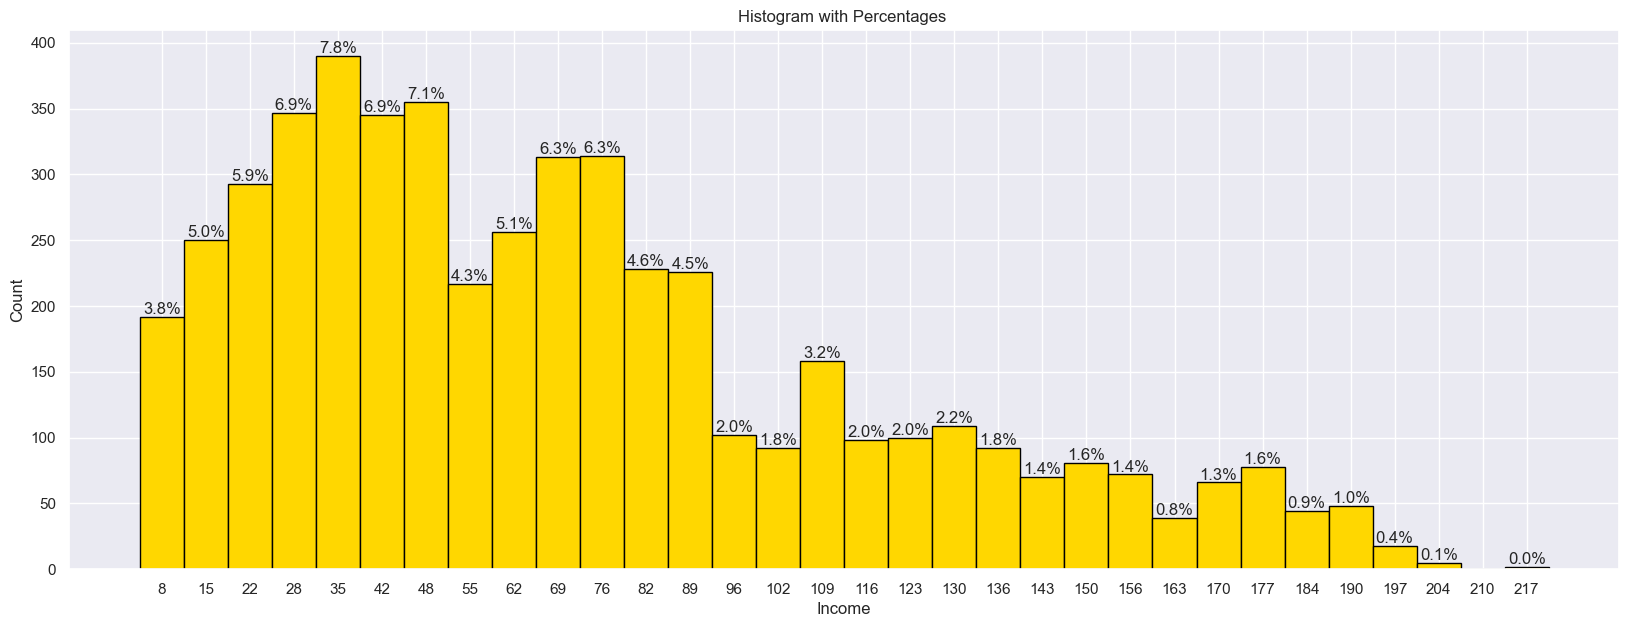

In [827]:
HistLablPlot (df_new,'Income')

#### Plot for CCAvg

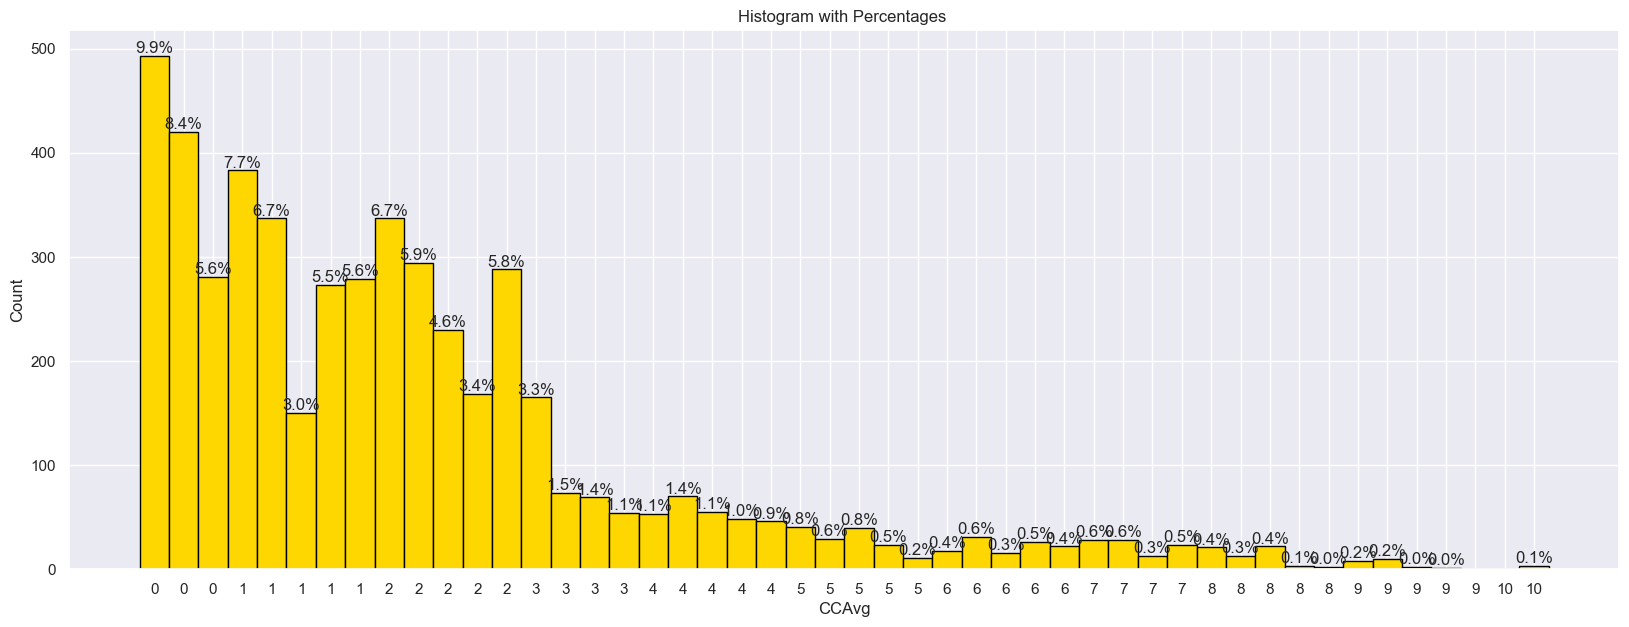

In [828]:
HistLablPlot (df_new,'CCAvg')

#### Plot for Morgage biger than 0

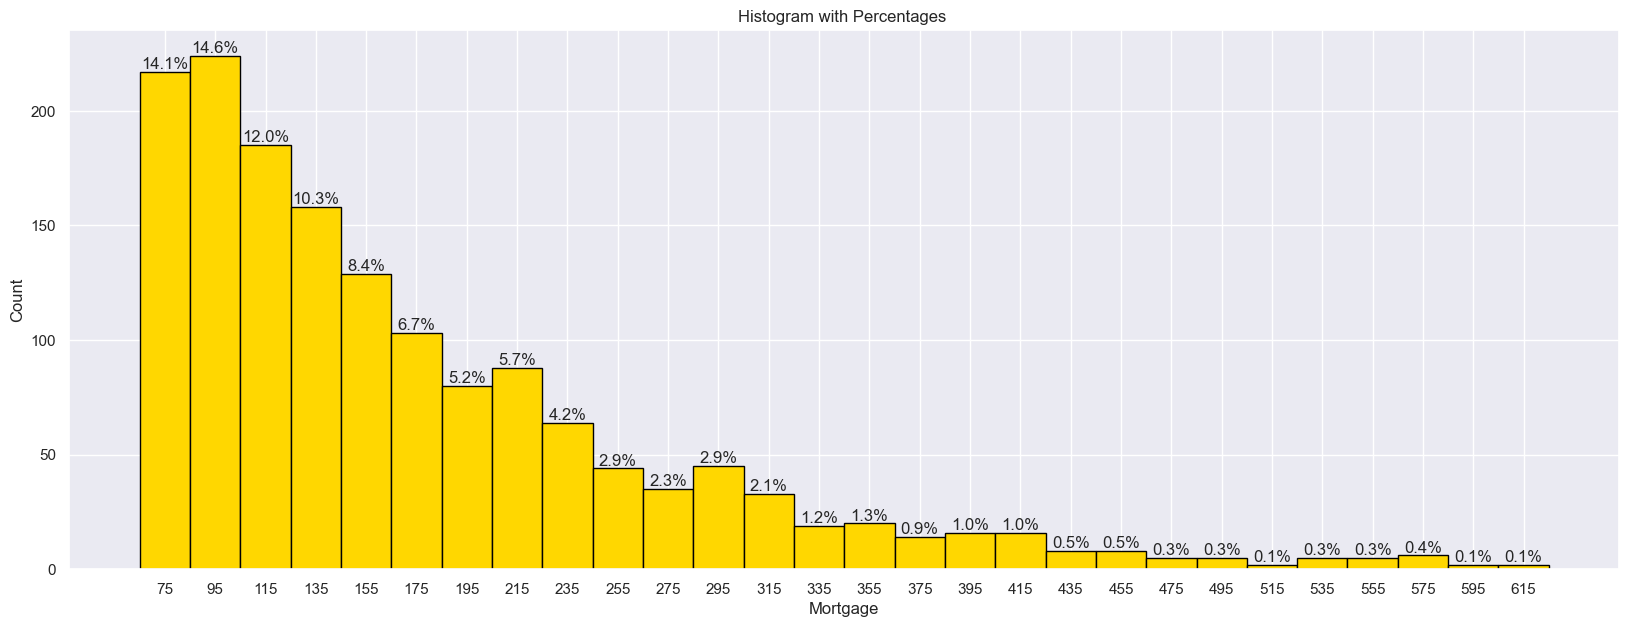

In [829]:
HistLablPlot (df[df['Mortgage']>0],'Mortgage')

In [830]:
# Bar plot for catigorical value
import seaborn as sns
import matplotlib.pyplot as plt

def BarPlot(data,feature):
# Sample categorical data
    categories = data[feature].unique()
    counts = df_new[feature].value_counts() 

# Calculate the total count and the percentage of each category
    total = sum(counts)
    percentages = [100 * count / total for count in counts]

# Create the bar plot
    sns.barplot(x=categories, y=counts, color='greenyellow')

# Annotate each bar with the percentage
    for i, percentage in enumerate(percentages):
        plt.text(i, counts[i] / 2, f'{percentage:.1f}%', ha='center', va='center', color='black')

    plt.show()

#### Plot for Education

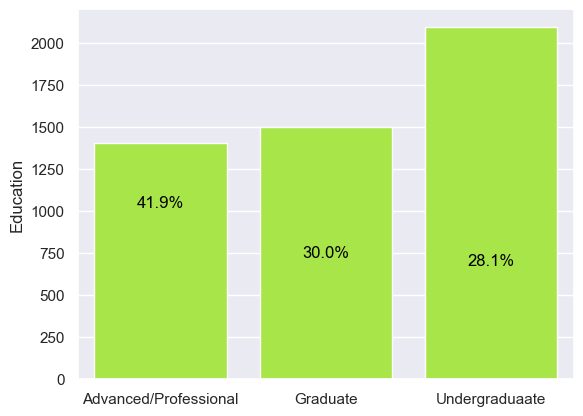

In [831]:
BarPlot(df_new,"Education")

#### Plot for Personal_Loan

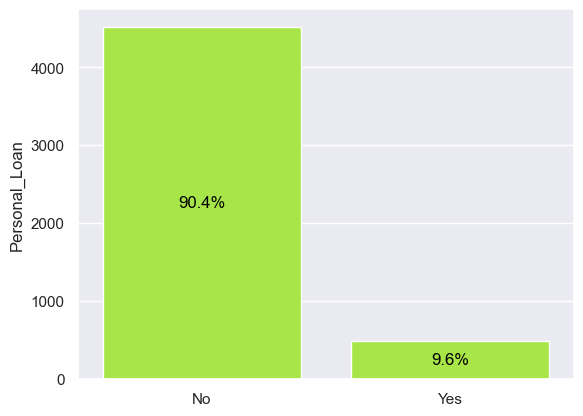

In [832]:
BarPlot(df_new,"Personal_Loan")

#### Plot for Securities_Account

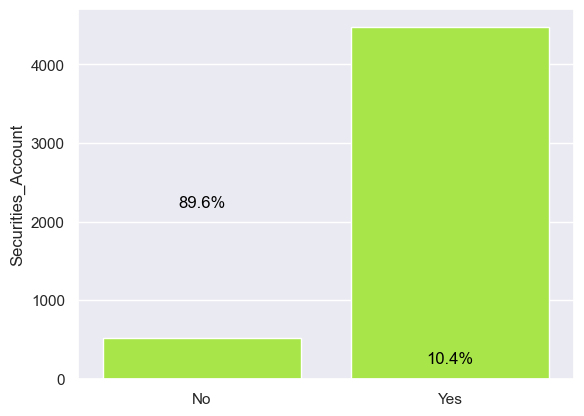

In [833]:
BarPlot(df_new,"Securities_Account")

#### Plot for CD_Account

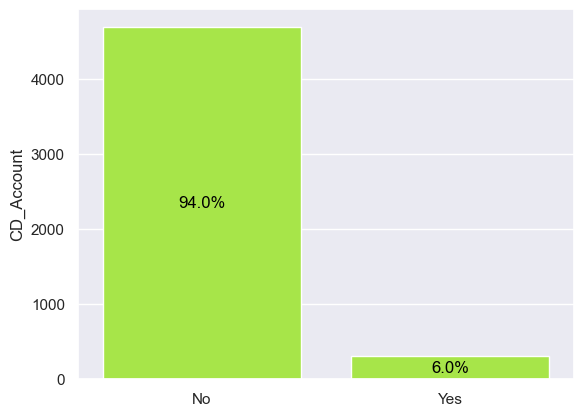

In [834]:
BarPlot(df_new,"CD_Account")

#### Plot for Online

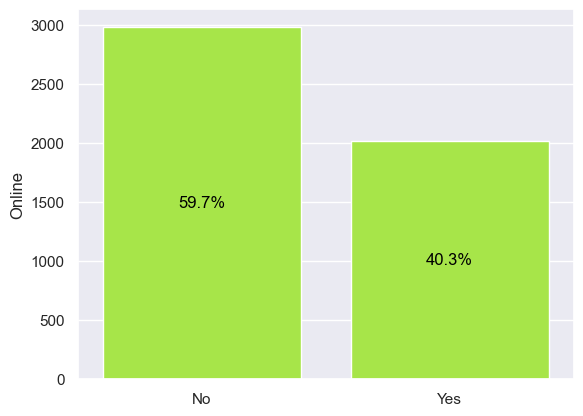

In [835]:
BarPlot(df_new,"Online")

#### Plot for CreditCard

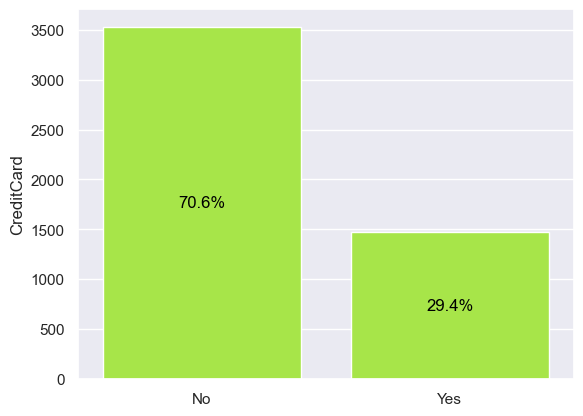

In [836]:
BarPlot(df_new,"CreditCard")

#### Let's check how a customer's interest in purchasing a loan varies with their age

In [39]:
# No data null
df.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

### finding outlier

In [64]:
# calcoulate Q1,Q2,Q3
numeric_column=['Age','Experience','Income','Family','CCAvg','Mortgage']
Q1=df_new[numeric_column].quantile(.25)
Q2=df_new[numeric_column].quantile(.50)
Q3=df_new[numeric_column].quantile(.75)

In [65]:
# Calculating Outlier
df_n=df[numeric_column]
IQR=Q3-Q1
outliers = df_n[((df_n < (Q1 - 1.5 * IQR)) | (df_n > (Q3 + 1.5 * IQR)))]

# Sum of outlier for each numeric value
outliers.sum()


Age                0.0
Experience         0.0
Income         18688.0
Family             0.0
CCAvg           2217.8
Mortgage      103498.0
dtype: float64

In [84]:
# Total number of  outlier
out1=outliers['Income'].value_counts().sum()
out2=outliers['CCAvg'].value_counts().sum()
out3=outliers['Mortgage'].value_counts().sum()

print ('Total number of  Income outlier',out1)
print ('Total number of  CCAvg outlier',out2)
print ('Total number of  Mortgage outlier',out3)

Total number of  Income outlier 96
Total number of  CCAvg outlier 324
Total number of  Mortgage outlier 291


### Data Preparation for Modeling 

In [16]:
df['Education']=df['Education'].replace({1:'Undergraduaate',2:'Graduate',3:'Advanced/Professional'})

In [22]:
df['ZIPCode']=df['ZIPCode'].astype(str)
df['ZIPCode']=df['ZIPCode'].str[0:2]

In [24]:
X=df.drop(['Personal_Loan','Experience','ID'],axis=1)
Y=df['Personal_Loan']
X=pd.get_dummies(X,columns=['Education','ZIPCode'],drop_first=True)

X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=.30,random_state=1)

In [25]:
X_train.head()

,Age,Income,Family,CCAvg,Mortgage,Securities_Account,CD_Account,Online,CreditCard,Education_Graduate,Education_Undergraduaate,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96
1334,47,35,2,1.3,0,0,0,1,0,0,1,0,0,0,1,0,0
4768,38,39,1,2.0,0,0,0,1,0,1,0,0,0,1,0,0,0
65,59,131,1,3.8,0,0,0,1,1,0,1,1,0,0,0,0,0
177,29,65,4,1.8,244,0,0,0,0,1,0,0,0,0,1,0,0
4489,39,21,3,0.2,0,0,0,1,0,1,0,0,0,0,0,1,0


In [26]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(Y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(Y_test.value_counts(normalize=True))

Shape of Training set :  (3500, 17)
Shape of test set :  (1500, 17)
Percentage of classes in training set:
0    0.905429
1    0.094571
Name: Personal_Loan, dtype: float64
Percentage of classes in test set:
0    0.900667
1    0.099333
Name: Personal_Loan, dtype: float64


## Model Building

### Model Evaluation Criterion

In [27]:
model = DecisionTreeClassifier(criterion='gini',random_state=1)                     
                               


In [28]:
# Train the model
model.fit(X_train,Y_train)

DecisionTreeClassifier(random_state=1)

#### Checking model performance on training data

In [29]:
# Evaluate Performance
def Evaluation (model,pridictor,target):
    
    Y_pred=model.predict(pridictor)
    
    accuracy=round(accuracy_score(target,Y_pred),3)

    recall=round(recall_score(target,Y_pred),3)

    precision=round(precision_score(target,Y_pred),3)

    f1=round(f1_score(target,Y_pred),3)
    
    eva={'f1=':f1,'accuracy=':accuracy,'recall=':recall,'precision=':precision}
    
    return eva

In [30]:
Evaluation(model,X_train,Y_train)

{'f1=': 1.0, 'accuracy=': 1.0, 'recall=': 1.0, 'precision=': 1.0}

In [74]:
# Confusion Matrix

def Plot_Confusion_Matrix (model,pridector,target):   
    Y_pred=model.predict(pridector)
    cm=confusion_matrix(target,Y_pred)
    sns.heatmap(cm,annot=True,fmt="d")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    
    print('Confusion Matrix %',cm)
    

Confusion Matrix % [[3169    0]
 [   0  331]]


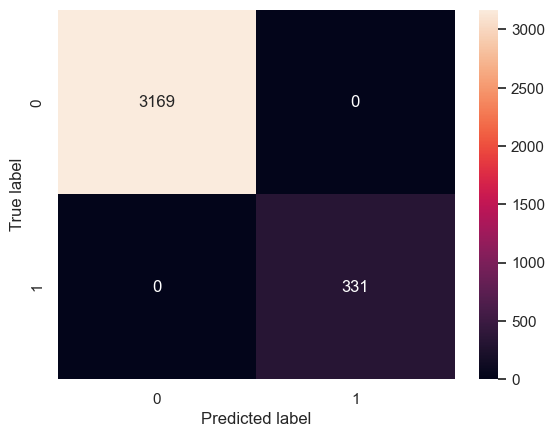

In [75]:
Plot_Confusion_Matrix (model,X_train,Y_train)

### Visualizing the Decision Tree¶

In [69]:

feature_names

['Age',
 'Income',
 'Family',
 'CCAvg',
 'Mortgage',
 'Securities_Account',
 'CD_Account',
 'Online',
 'CreditCard',
 'Education_Graduate',
 'Education_Undergraduaate',
 'ZIPCode_91',
 'ZIPCode_92',
 'ZIPCode_93',
 'ZIPCode_94',
 'ZIPCode_95',
 'ZIPCode_96']

In [68]:

from sklearn.tree import export_text
feature_names = list(X_train.columns)
text_representation = export_text(model,feature_names=feature_names,show_weights=True)
print(text_representation)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [2553.00, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family <= 3.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Education_Undergraduaate <= 0.50
|   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |--- Education_Undergraduaate >  0.50
|   |   |   |   |   |   |   |--- weights: [5.00, 0.00] class: 0
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [48.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Age <= 48.50
|   |   |   |   |   |   |   |   |--- Mortgage <= 204.00
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |   |--- Mortgage >  204.00
|   |   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] 

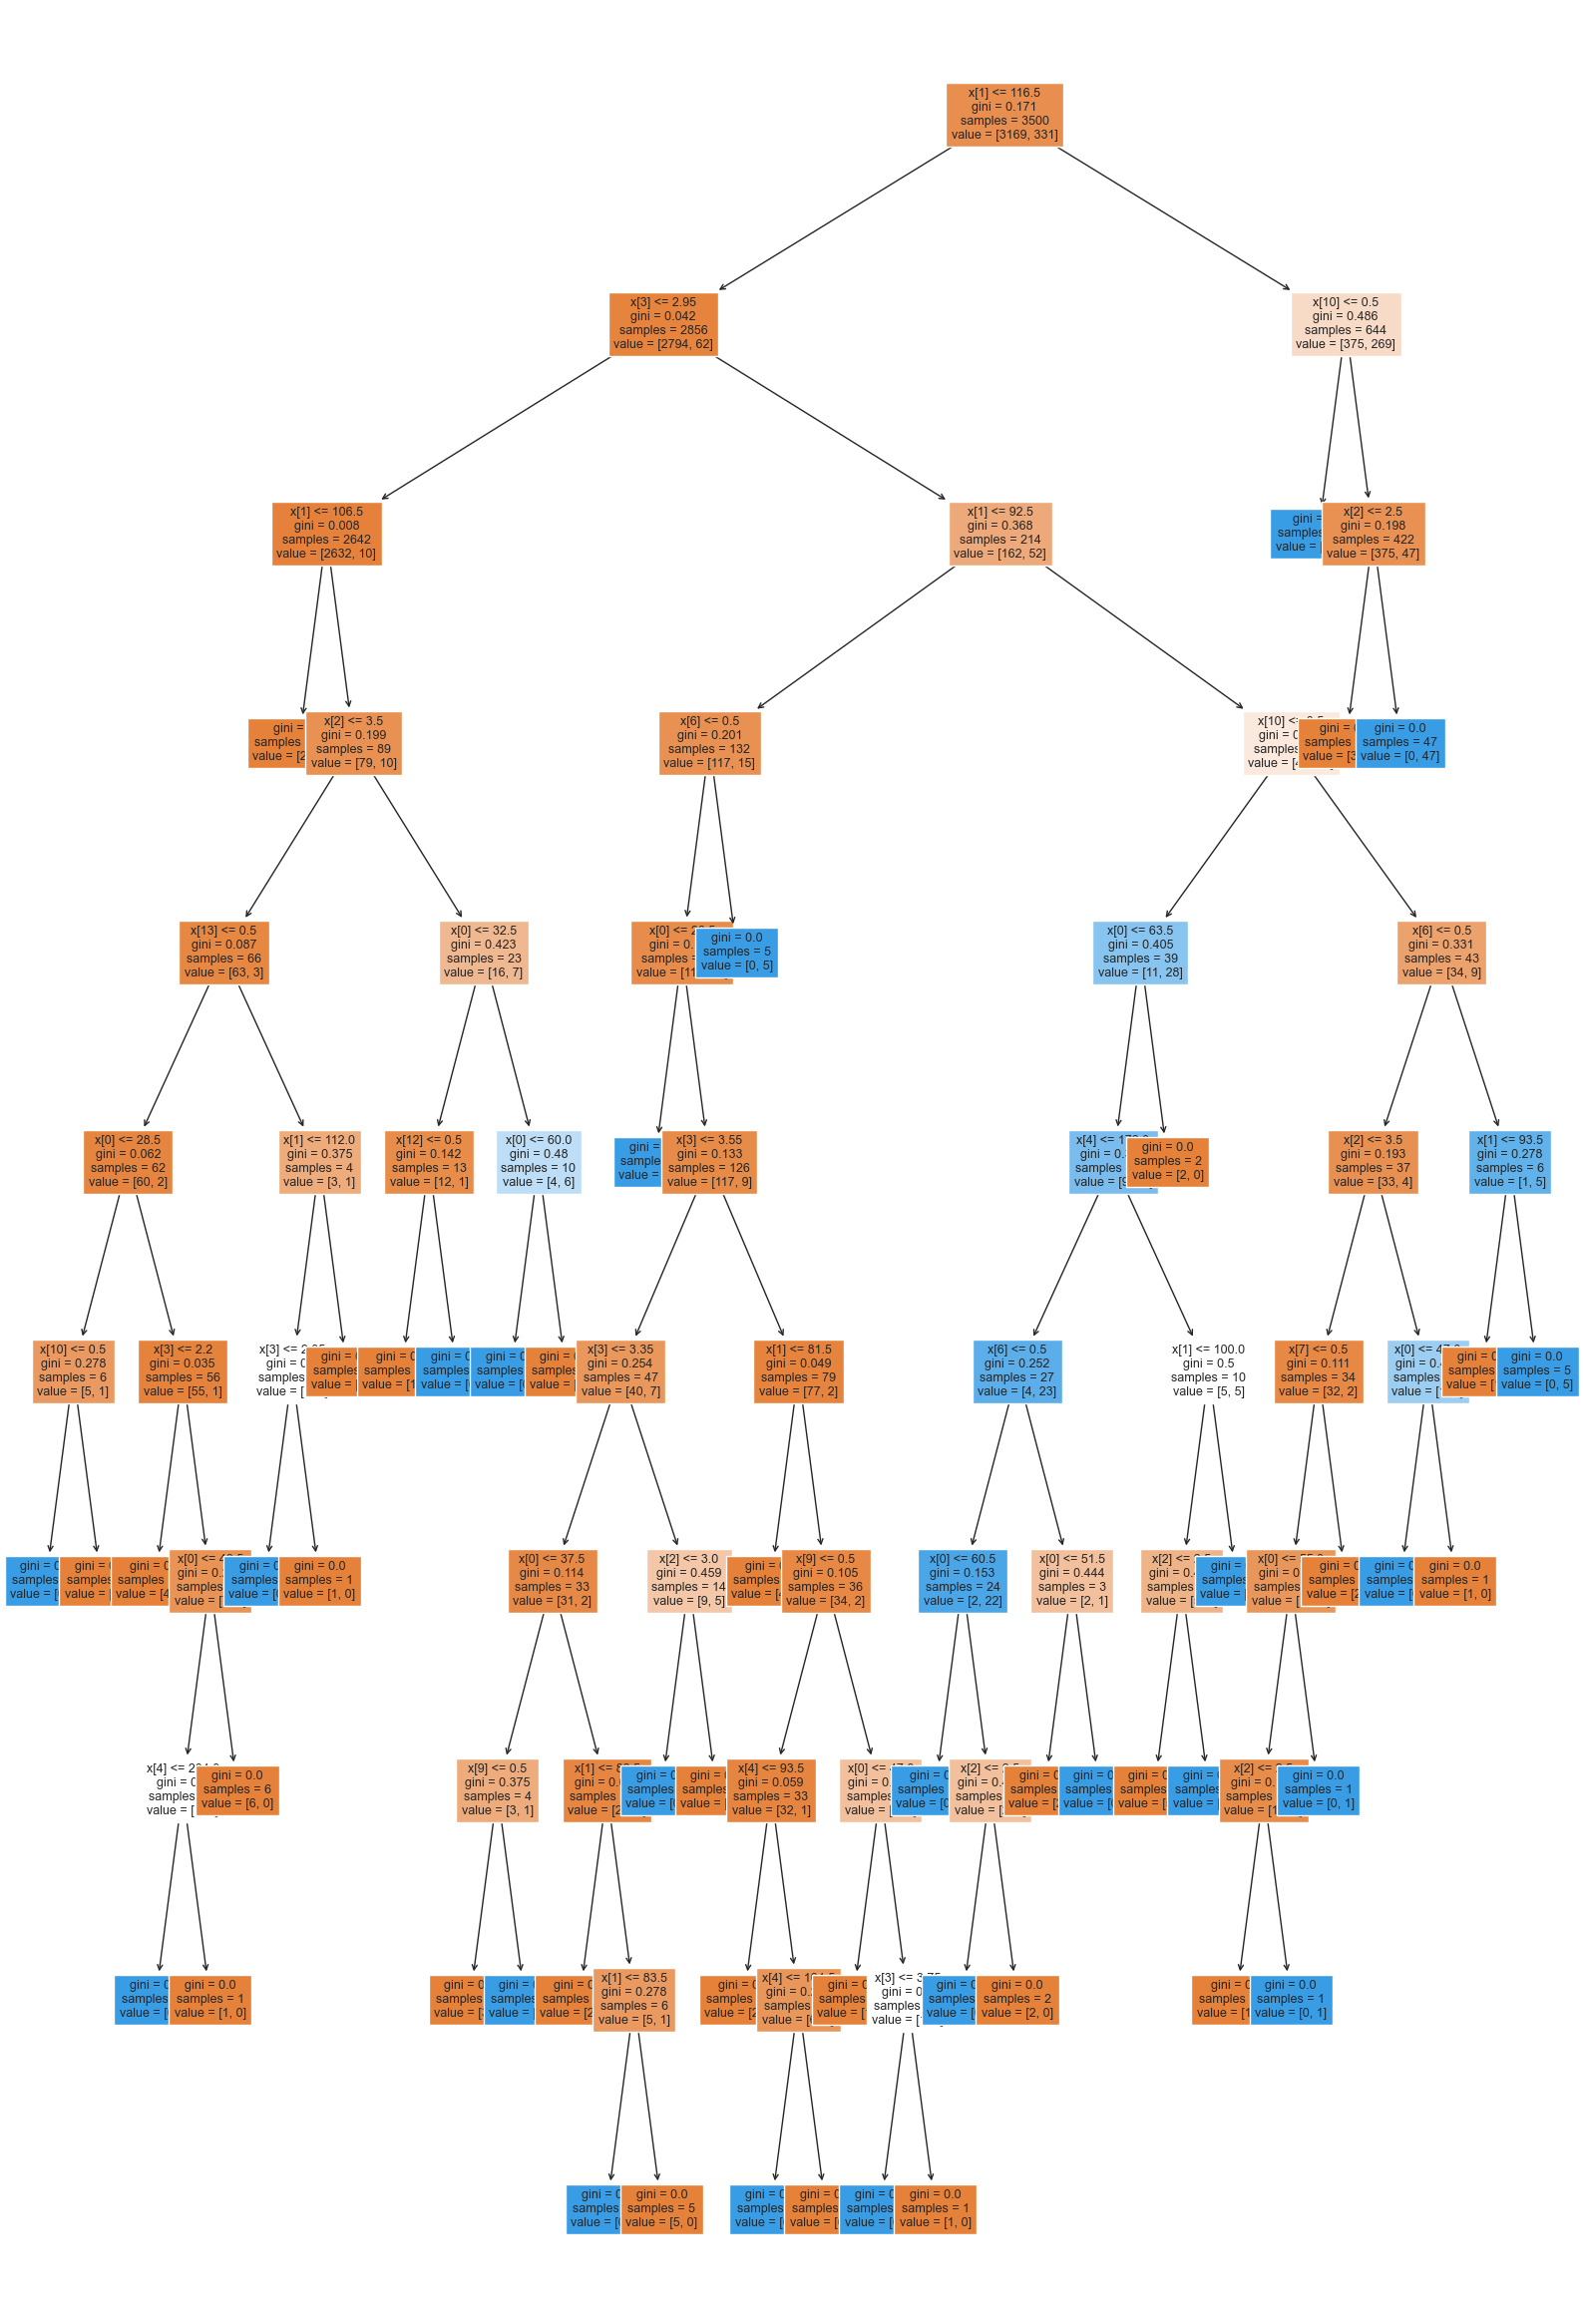

In [71]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,30))
plot_tree(model, filled=True,fontsize=9)
plt.show()

### Visualizatio of Decision Tree

In [77]:
feature_names = X_train.columns.tolist()
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Graduate', 'Education_Undergraduaate', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96']


In [78]:
# importance of features in the tree building ( The importance of a feature is computed as the
# (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

# Feature Importance
feature_importances=model.feature_importances_
for i, feature in enumerate(feature_names):
    print(f"Importance of {feature}: {feature_importances[i]:.4f}")


Importance of Age: 0.0334
Importance of Income: 0.3084
Importance of Family: 0.1674
Importance of CCAvg: 0.0459
Importance of Mortgage: 0.0079
Importance of Securities_Account: 0.0000
Importance of CD_Account: 0.0257
Importance of Online: 0.0006
Importance of CreditCard: 0.0000
Importance of Education_Graduate: 0.0033
Importance of Education_Undergraduaate: 0.4037
Importance of ZIPCode_91: 0.0000
Importance of ZIPCode_92: 0.0031
Importance of ZIPCode_93: 0.0006
Importance of ZIPCode_94: 0.0000
Importance of ZIPCode_95: 0.0000
Importance of ZIPCode_96: 0.0000


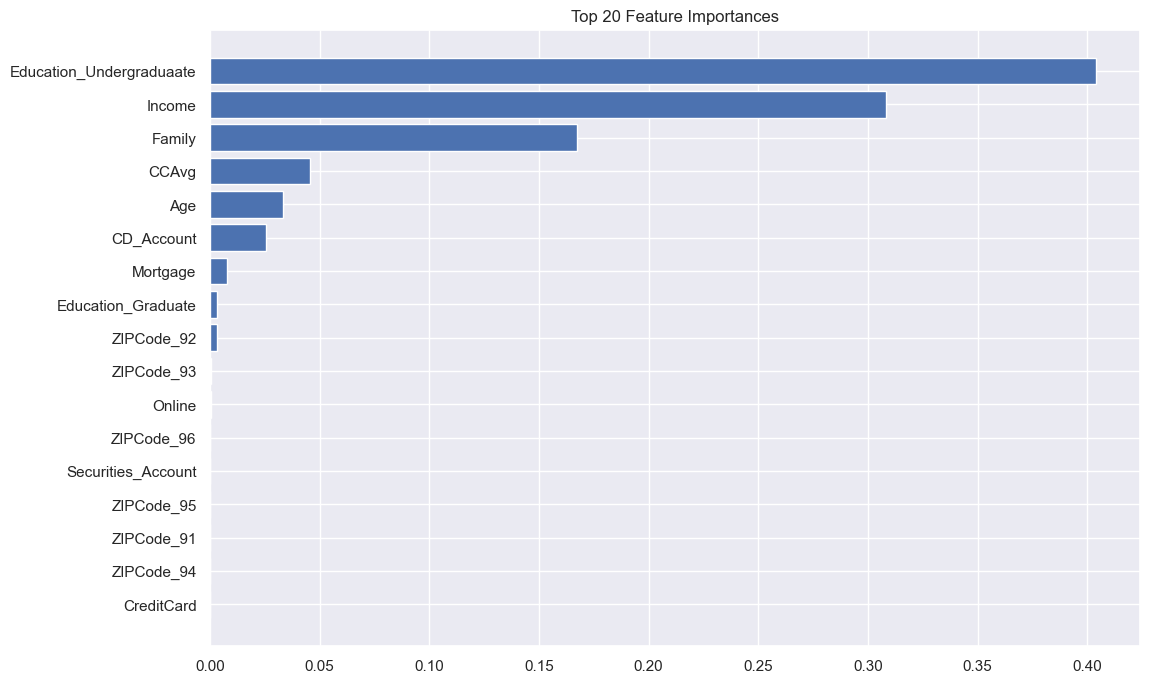

In [81]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'model' is your trained model
importances = model.feature_importances_



# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Decide how many features you want to display (e.g., top 20)
top_n = 17

# Select the indices of the top n features
top_indices = indices[:top_n]

# Create the plot
plt.figure(figsize=(12, 8))
plt.title('Top 20 Feature Importances')
plt.barh(range(top_n), importances[top_indices], color='b', align='center')
plt.yticks(range(top_n), np.array(feature_names)[top_indices])
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar at the top
plt.show()


#### Checking model performance on test data

In [82]:
Evaluation(model,X_test,Y_test)

{'f1=': 0.909, 'accuracy=': 0.982, 'recall=': 0.906, 'precision=': 0.912}

Confusion Matrix % [[1338   13]
 [  14  135]]


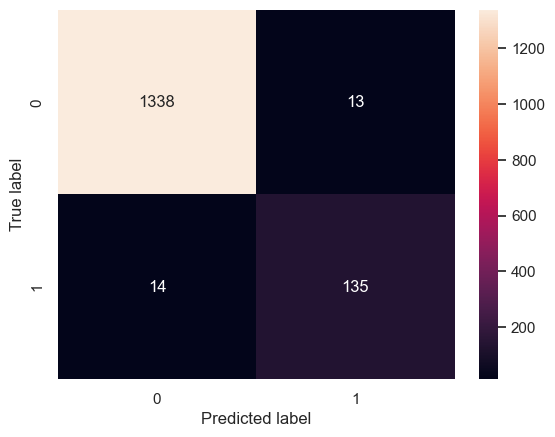

In [83]:
Plot_Confusion_Matrix (model,X_test,Y_test)

### Model Performance Improvement

### Pre_Pruning

In [84]:
# Hyperparameter Tuning. Use grid search or random search to find the best hyperparameters.
from sklearn.model_selection import GridSearchCV

paramiters={'max_depth':np.arange(6, 11),'min_samples_leaf':np.arange(5, 12),"max_leaf_nodes": np.arange(5, 12)}
# Run grid search
grid_search=GridSearchCV(estimator=model,scoring='recall',param_grid=paramiters,cv=5)
grid_search.fit(X_train,Y_train)

# Get the best parameters 
best_params=grid_search.best_params_
# creat new model with best paramiters
best_model= DecisionTreeClassifier(**best_params,random_state=1)
# fit the model of the best parameters 
best_model.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=6, max_leaf_nodes=8, min_samples_leaf=7,
                       random_state=1)

In [85]:
# Cross-Validation to ensure the model’s stability.
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X,Y,cv=5)
scores

array([0.981, 0.984, 0.982, 0.983, 0.977])

##### Checking performance on training data

In [86]:
Evaluation (best_model,X_train,Y_train)

{'f1=': 0.934, 'accuracy=': 0.988, 'recall=': 0.915, 'precision=': 0.953}

Confusion Matrix % [[3154   15]
 [  28  303]]


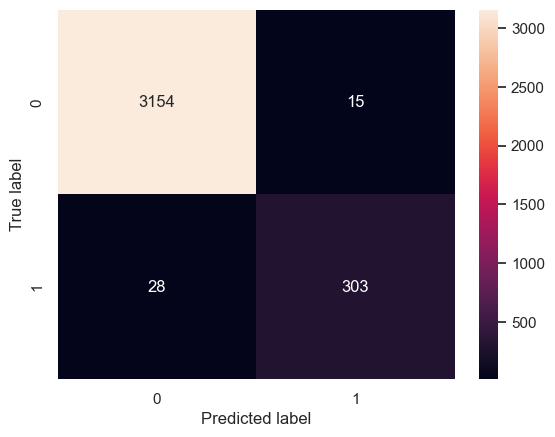

In [87]:
Plot_Confusion_Matrix (best_model,X_train,Y_train)

##### Visualizing the Decision Tree

In [88]:
feature_names = X_train.columns.tolist()
print(feature_names)

['Age', 'Income', 'Family', 'CCAvg', 'Mortgage', 'Securities_Account', 'CD_Account', 'Online', 'CreditCard', 'Education_Graduate', 'Education_Undergraduaate', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96']


In [89]:

# Feature Importance
feature_importances=best_model.feature_importances_
for i, feature in enumerate(feature_names):
    print(f"Importance of {feature}: {feature_importances[i]:.4f}")

Importance of Age: 0.0000
Importance of Income: 0.3347
Importance of Family: 0.1661
Importance of CCAvg: 0.0430
Importance of Mortgage: 0.0000
Importance of Securities_Account: 0.0000
Importance of CD_Account: 0.0000
Importance of Online: 0.0000
Importance of CreditCard: 0.0000
Importance of Education_Graduate: 0.0000
Importance of Education_Undergraduaate: 0.4562
Importance of ZIPCode_91: 0.0000
Importance of ZIPCode_92: 0.0000
Importance of ZIPCode_93: 0.0000
Importance of ZIPCode_94: 0.0000
Importance of ZIPCode_95: 0.0000
Importance of ZIPCode_96: 0.0000


In [90]:
from sklearn.tree import export_text
feature_names = list(X_train.columns)
text_representation = export_text(best_model,feature_names=feature_names,show_weights=True)
print(text_representation)

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- weights: [2632.00, 10.00] class: 0
|   |--- CCAvg >  2.95
|   |   |--- Income <= 92.50
|   |   |   |--- weights: [117.00, 15.00] class: 0
|   |   |--- Income >  92.50
|   |   |   |--- Education_Undergraduaate <= 0.50
|   |   |   |   |--- weights: [11.00, 28.00] class: 1
|   |   |   |--- Education_Undergraduaate >  0.50
|   |   |   |   |--- Family <= 2.50
|   |   |   |   |   |--- weights: [30.00, 3.00] class: 0
|   |   |   |   |--- Family >  2.50
|   |   |   |   |   |--- weights: [4.00, 6.00] class: 1
|--- Income >  116.50
|   |--- Education_Undergraduaate <= 0.50
|   |   |--- weights: [0.00, 222.00] class: 1
|   |--- Education_Undergraduaate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [375.00, 0.00] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [0.00, 47.00] class: 1



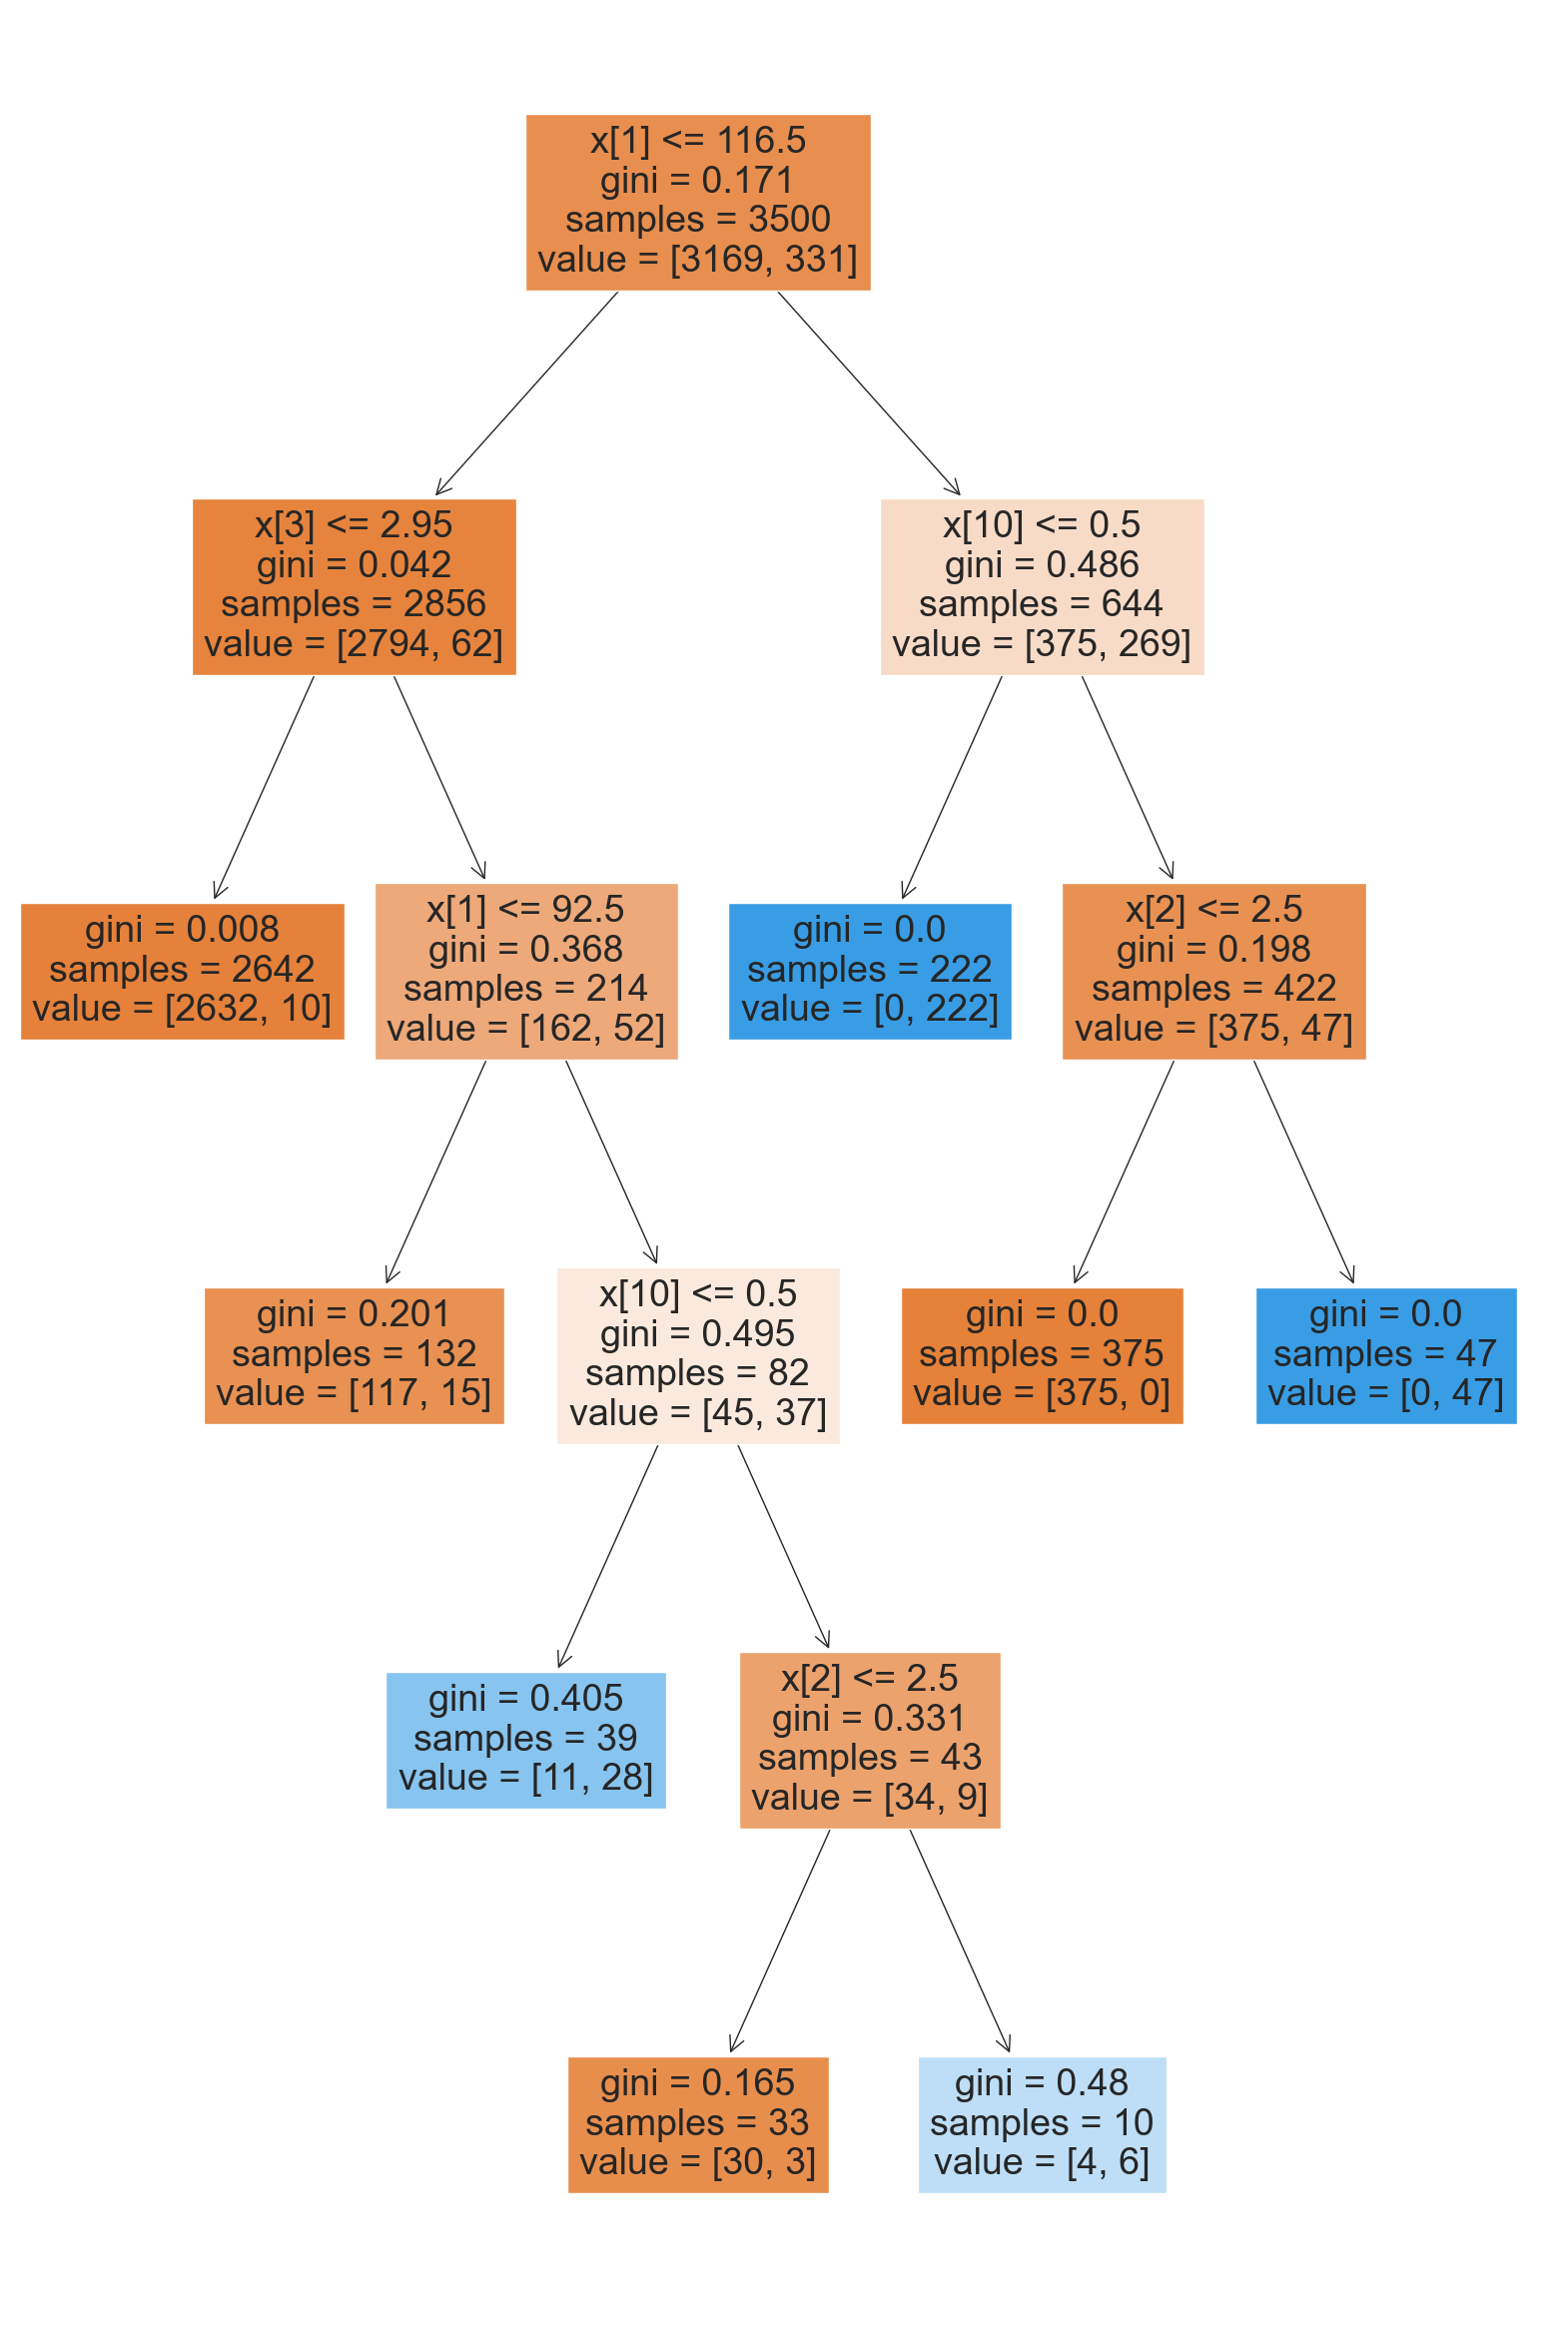

In [91]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20,30))
plot_tree(best_model, filled=True)
plt.show()

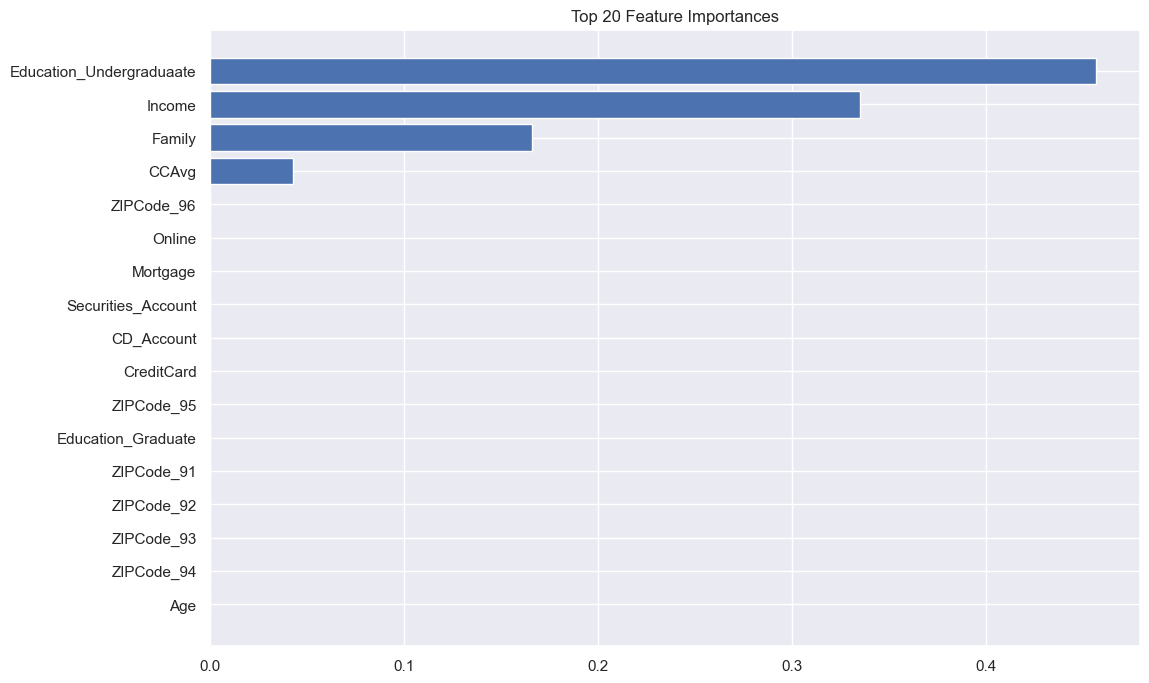

In [93]:
import matplotlib.pyplot as plt
import numpy as np


importances = best_model.feature_importances_



# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Decide how many features you want to display (e.g., top 17)
top_n = 17

# Select the indices of the top n features
top_indices = indices[:top_n]

# Create the plot
plt.figure(figsize=(12, 8))
plt.title('Top 17 Feature Importances')
plt.barh(range(top_n), importances[top_indices], color='b', align='center')
plt.yticks(range(top_n), np.array(feature_names)[top_indices])
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar at the top
plt.show()

#### Checking performance on test data

In [94]:
Evaluation (best_model,X_test,Y_test)

{'f1=': 0.891, 'accuracy=': 0.979, 'recall=': 0.852, 'precision=': 0.934}

Confusion Matrix % [[1342    9]
 [  22  127]]


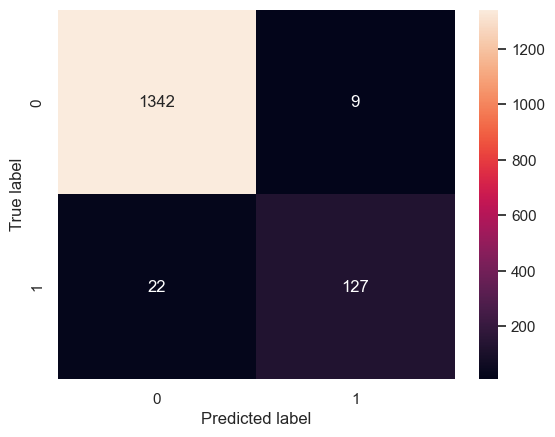

In [95]:
Plot_Confusion_Matrix (best_model,X_test,Y_test)

#### Cost-Complexity Pruning¶

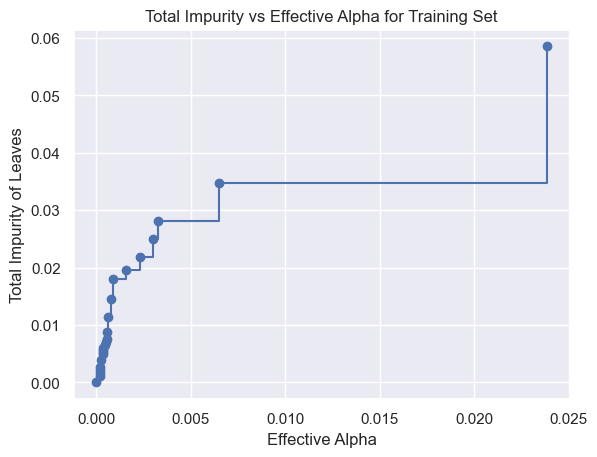

Number of nodes in the last tree is: 1 with ccp_alpha: 0.056364969335601575


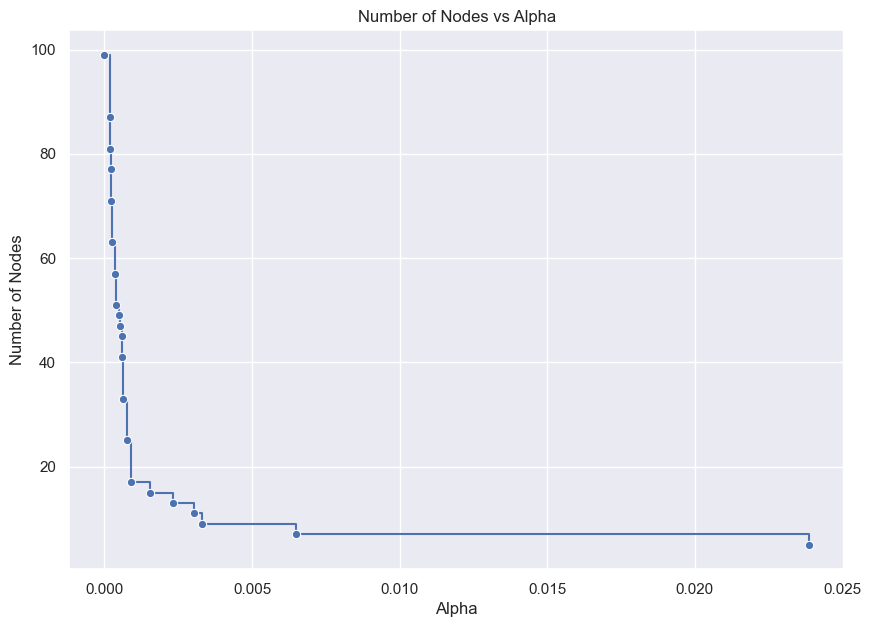

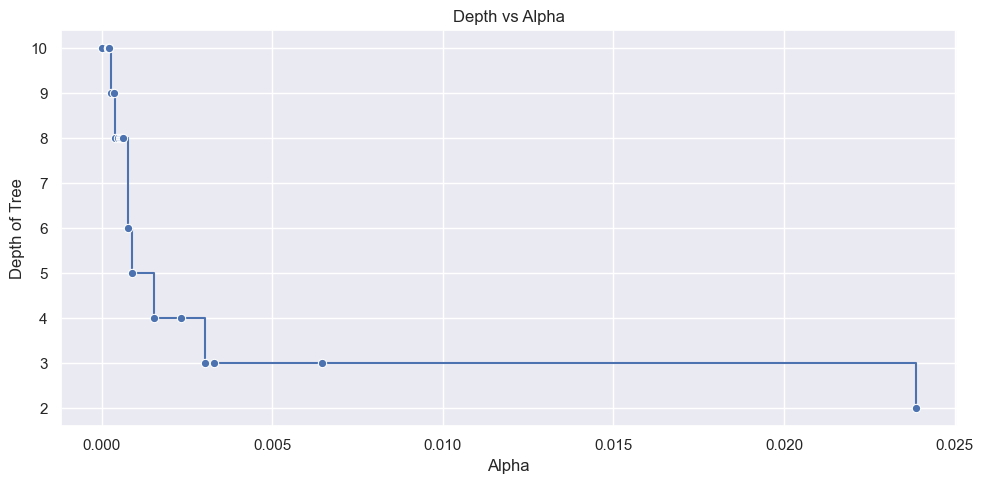

Accuracy after pruning: 0.98


In [99]:
# Train a decision tree classifier without pruning
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, Y_train)

# Get the cost complexity pruning path
path = clf.cost_complexity_pruning_path(X_train, Y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# Plot the total impurity of leaves vs effective alphas
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle='steps-post')
ax.set_xlabel('Effective Alpha')
ax.set_ylabel('Total Impurity of Leaves')
ax.set_title('Total Impurity vs Effective Alpha for Training Set')
plt.show()

# Train a series of decision trees with different alpha values
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, Y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)
# Remove the last element in clfs and ccp_alphas, because it is the trivial tree with only one node
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

# Plot Number of Nodes vs Alpha
node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
plt.figure(figsize=(10, 7))  # Create a new figure
sns.lineplot(x= ccp_alphas, y= node_counts, marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Number of Nodes")
plt.title("Number of Nodes vs Alpha")  # Corrected from plt.settitle to plt.title

# Plot Depth vs Alpha
plt.figure(figsize=(10, 5))  # Create a new figure
sns.lineplot(x=ccp_alphas, y=depth, marker="o", drawstyle="steps-post")
plt.xlabel("Alpha")
plt.ylabel("Depth of Tree")
plt.title("Depth vs Alpha")  # Corrected from plt.set_title to plt.title

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show plots
plt.show()
# Find the model with the best accuracy on the test data
best_accuracy = 0
best_clf = None
for clf in clfs:
    accuracy = clf.score(X_test, Y_test)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_clf = clf

# Model accuracy after pruning
accuracy_after_pruning = best_clf.score(X_test, Y_test)
print(f'Accuracy after pruning: {accuracy_after_pruning:.2f}')


In [100]:
pd.DataFrame(path)

,ccp_alphas,impurities
0,0.000000,0.000000
1,0.000186,0.001114
2,0.000187,0.001675
3,0.000214,0.002104
4,0.000216,0.002750
5,0.000268,0.003824
6,0.000359,0.004900
7,0.000381,0.005280
8,0.000381,0.005661
9,0.000381,0.006042


#### Recall vs alpha for training and testing sets

In [101]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train)
    values_train = recall_score(Y_train, pred_train)
    recall_train.append(values_train)

recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test)
    values_test = recall_score(Y_test, pred_test)
    recall_test.append(values_test)

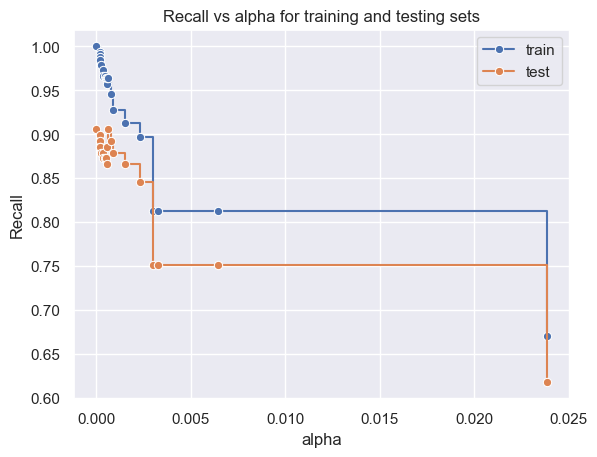

In [102]:
#plt.subplots(1,1,figsize=(15, 5))
plt.xlabel("alpha")
plt.ylabel("Recall")
plt.title("Recall vs alpha for training and testing sets")
sns.lineplot(x=ccp_alphas, y=recall_train, marker="o", label="train", drawstyle="steps-post")
sns.lineplot(x=ccp_alphas, y=recall_test, marker="o", label="test", drawstyle="steps-post")

plt.show()

#### Post-Purning

In [103]:
index_cost_model = np.argmax(recall_test)
cost_model = clfs[index_cost_model]
print(cost_model)

DecisionTreeClassifier(random_state=1)


In [104]:
estimator_2 = DecisionTreeClassifier(
    ccp_alpha=ccp_alpha, class_weight={0: 0.15, 1: 0.85}, random_state=1         ## Complete the code by adding the correct ccp_alpha value
)
estimator_2.fit(X_train, Y_train)

DecisionTreeClassifier(ccp_alpha=0.056364969335601575,
                       class_weight={0: 0.15, 1: 0.85}, random_state=1)

##### Checking performance on training data

In [105]:
Evaluation (cost_model,X_train,Y_train)

{'f1=': 1.0, 'accuracy=': 1.0, 'recall=': 1.0, 'precision=': 1.0}

Confusion Matrix % [[3169    0]
 [   0  331]]


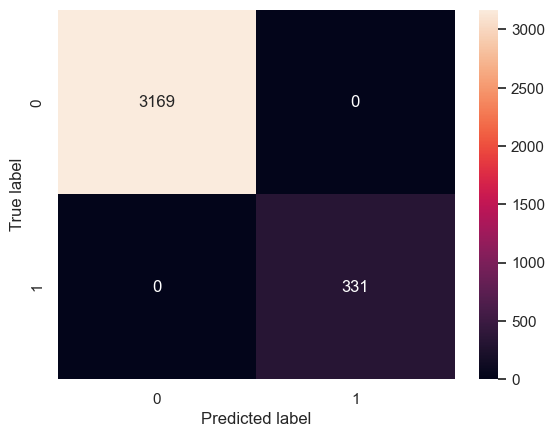

In [106]:
Plot_Confusion_Matrix (cost_model,X_train,Y_train)

### Visualizing the Decision Tree

In [108]:
from sklearn.tree import export_text
feature_names = list(X_train.columns)
text_representation = export_text(estimator_2,feature_names=feature_names,show_weights=True)
print(text_representation)

|--- Income <= 98.50
|   |--- weights: [392.70, 18.70] class: 0
|--- Income >  98.50
|   |--- Education_Undergraduaate <= 0.50
|   |   |--- weights: [13.35, 214.20] class: 1
|   |--- Education_Undergraduaate >  0.50
|   |   |--- Family <= 2.50
|   |   |   |--- weights: [67.65, 2.55] class: 0
|   |   |--- Family >  2.50
|   |   |   |--- weights: [1.65, 45.90] class: 1



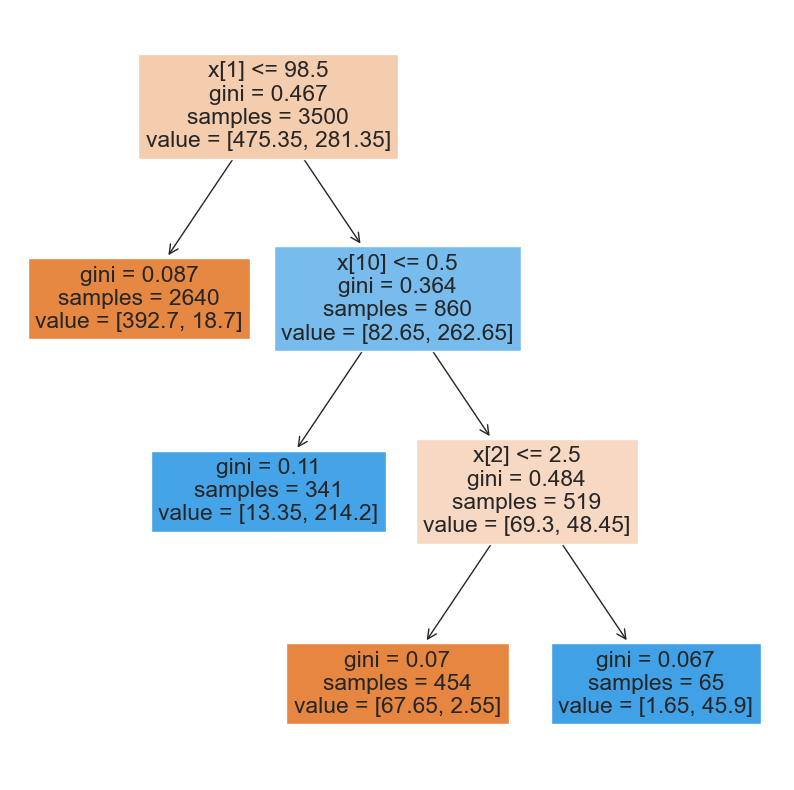

In [112]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
plot_tree(estimator_2, filled=True)
plt.show()

In [113]:
# Feature Importance
feature_importances = estimator_2.feature_importances_

# Create a list of tuples containing feature names and their importances
feature_importances_sorted = sorted(zip(feature_names, feature_importances), key=lambda x: x[1], reverse=True)

# Print feature importances in descending order
for feature, importance in feature_importances_sorted:
    print(f"Importance of {feature}: {importance:.4f}")

Importance of Income: 0.6749
Importance of Family: 0.1720
Importance of Education_Undergraduaate: 0.1531
Importance of Age: 0.0000
Importance of CCAvg: 0.0000
Importance of Mortgage: 0.0000
Importance of Securities_Account: 0.0000
Importance of CD_Account: 0.0000
Importance of Online: 0.0000
Importance of CreditCard: 0.0000
Importance of Education_Graduate: 0.0000
Importance of ZIPCode_91: 0.0000
Importance of ZIPCode_92: 0.0000
Importance of ZIPCode_93: 0.0000
Importance of ZIPCode_94: 0.0000
Importance of ZIPCode_95: 0.0000
Importance of ZIPCode_96: 0.0000


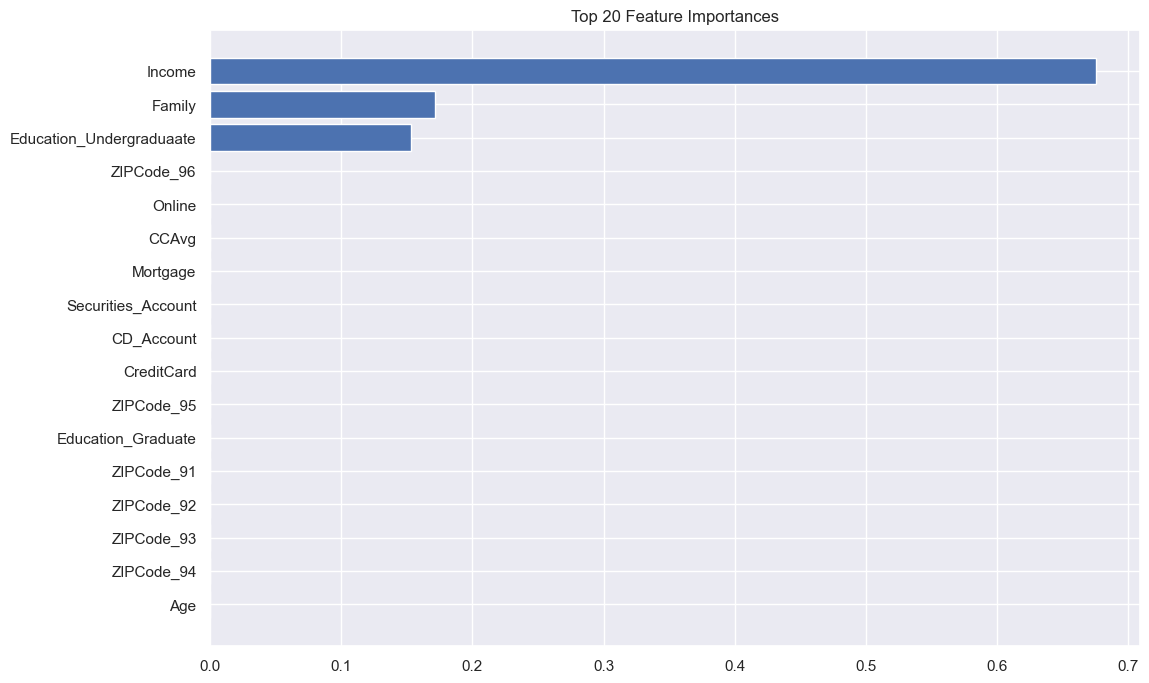

In [115]:
# Assuming 'model' is your trained model
importances = estimator_2.feature_importances_



# Sort the feature importances in descending order and get the indices
indices = np.argsort(importances)[::-1]

# Decide how many features you want to display (e.g., top 20)
top_n = 17

# Select the indices of the top n features
top_indices = indices[:top_n]

# Create the plot
plt.figure(figsize=(12, 8))
plt.title('Top 20 Feature Importances')
plt.barh(range(top_n), importances[top_indices], color='b', align='center')
plt.yticks(range(top_n), np.array(feature_names)[top_indices])
plt.gca().invert_yaxis()  # Invert the y-axis to have the highest bar at the top
plt.show()

#### Checking performance on test data

In [116]:
Evaluation (cost_model,X_test,Y_test)

{'f1=': 0.909, 'accuracy=': 0.982, 'recall=': 0.906, 'precision=': 0.912}

Confusion Matrix % [[1338   13]
 [  14  135]]


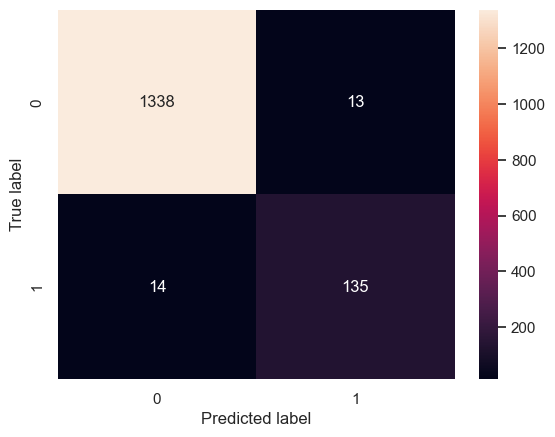

In [117]:
Plot_Confusion_Matrix (cost_model,X_test,Y_test)

## Model Comparison and Final Model Selection

In [120]:
 #Given dictionaries
dict1 = Evaluation (model,X_train,Y_train)
dict2 = Evaluation (best_model,X_train,Y_train)

# Convert dictionaries to DataFrame
compaire = pd.DataFrame([dict1, dict2])

# Rename index values 
compaire.rename(index={0: 'Sklearn', 1: 'Pre Purning'}, inplace=True)

# Print the DataFrame
print("Comparing  on Train")
print(compaire)

Comparing  on Train
               f1=  accuracy=  recall=  precision=
Sklearn      1.000      1.000    1.000       1.000
Pre Purning  0.934      0.988    0.915       0.953


In [121]:
#Given dictionaries
dict1 = Evaluation (model,X_test,Y_test)
dict2 = Evaluation (best_model,X_test,Y_test)

# Convert dictionaries to DataFrame
compaire = pd.DataFrame([dict1, dict2])

# Rename index values 
compaire.rename(index={0: 'Sklearn', 1: 'Pre Purning'}, inplace=True)
print("Comparing  on Test")
# Print the DataFrame
print(df)

Comparing  on Test
               f1=  accuracy=  recall=  precision=
Sklearn      0.909      0.982    0.906       0.912
Pre Purning  0.891      0.979    0.852       0.934


## Actionable Insights and Business Recommendations


Summary of data

1-	5000 rows and 14 columns

2-	df_dtypes: float64(1), int64(13)before modifing

3-	No Null Number

4-	3462 People has No mortgage

5-	  347 Number unique mortgage

6-	1470  customers have credit cards

7-	4520 number of how did not have loan . 90.4%

8-	480 number of how did have loan

9-	education: 

Undergraduate = 20961   

Advanced/Professional =15012  

Graduate =1403

10-	Personal_Loan  Education      

     No             Undergraduate           2003
     
                    Advanced/Professional    1296
                               
                    Graduate                 1221
                               
     Yes            Advanced/Professional     205
            
                    Graduate                  182
                
                    Undergraduate             93
                               
11-	522  customer have securities account with the bank

12-	302  customer have a certificate of deposit (CD) account with the Bank

13-2984 customers use internet banking facilities

14-522 customer have securities account with the bank

15-personal Loan four most corr  :

       Income                0.430739 
       
       CD_Account            0.316355
       
       CCAvg                 0.313957
       
       Education             0.139492
       
16- plot 

      'CCAvg','Personal_Loan = Yes'=>Right skew
      
      'CCAvg','Personal_Loan = No'=> Right skew
      
17 

       'Income','Personal_Loan = Yes'=>Left skew
       
       'Income','Personal_Loan = No'=> Right skew
18 
       'Mortgage','Personal_Loan = Yes'=>Right skew
       
       'Mortgage','Personal_Loan = No'=> Right skew
       
19- histplot for Income, Mortgage and CCAvg has right skew

20- 

•	Age: Average age of customers is 45 years

•	Experience:	Tne median experience of customers is 20 years

•	Income:	Average income of customers is $73k 

•	CCAvg:	Customers have average  $1.93 in month.

•	Mortgage:	Average mortgage is $56k 

•	Family:	Family average is 2.4

21- Outlier

    Total number of  Income outlier 96
    
    Total number of  CCAvg outlier 324
    
    Total number of  Mortgage outlier 291


Conclusion: The Post-Pruning model is the best among the three. It matches the Sklearn model in test performance, which is the ultimate measure of a model’s generalization ability. However, it likely achieves this with a simpler model (due to pruning), which is generally preferred in machine learning for better interpretability and potentially less overfitting.



### What recommedations would you suggest to the bank?

- Bank has to work on costumer base on Income, Family, Education.

- personal Loan most four corr : Income 0.430739 ,CD_Account 0.316355 ,CCAvg 0.313957, Education 0.139492

- customer high income ,more family and advace education more lakily get loan

- customer who has more family has more chance to get loan 

- We creat 3 model to work on data set 

- Bank should work on customer who has more family and more income

- Customers who have a  CD_Account most lakily nedd  a Personal Loan

- Undergraduate custory  they are not interested to get loan



___